In [1]:
import pyforest

In [2]:
df = pd.read_csv('austo_automobile.csv')

df.head()

<IPython.core.display.Javascript object>

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [3]:
print('Number of rows in dataset is '+str(df.shape[0]))
print('Number of columns in dataset is '+str(df.shape[1]))

Number of rows in dataset is 1581
Number of columns in dataset is 14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [5]:
print('*'*50)
print('Number of rows in dataset is '+str(df.shape[0]))
print('Number of columns in dataset is '+str(df.shape[1]))
print('*'*50)
print('Number of INT64 datatype columns is '+str(len(df.select_dtypes('int64').columns)))
print('Number of FLOAT64 datatype columns is '+str(len(df.select_dtypes('float64').columns)))
print('Number of OBJECT datatype columns is '+str(len(df.select_dtypes('object').columns)))
print('*'*50)

**************************************************
Number of rows in dataset is 1581
Number of columns in dataset is 14
**************************************************
Number of INT64 datatype columns is 5
Number of FLOAT64 datatype columns is 1
Number of OBJECT datatype columns is 8
**************************************************


- 2 marks 
    - Size
    - Nature of variables

- Size of the dataset,
    - No. of  Rows  in dataset is 1581
    - No. of Columns in dataset is 14
- Nature of the variables,
    - No. of **INT64** datatype columns is 5
    - No. of **FLOAT64** datatype columns is 1
    - No. of **OBJECT** datatype columns is 8

- 8 marks (Desc stats +  Pre-Processing + EDA)
    - Check missing values
        - explain the cause if needed
    - Describe data for numerical and categorical
        - find outliers
        - find Spell mistakes
        - check inconsistency of the data
    - Treating outliers or bad data
        - Use IQR for outliers
        - correct spell mistakes - Gender 
    - Impute missing values
        - For Total salary = salary+partner salary
        - For gender - use any technique

In [6]:
df.isna().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [8]:
df.isna().sum()[df.isna().sum()!=0]

Gender             53
Partner_salary    106
dtype: int64

In [9]:
53/1581, 106/1581

(0.033523086654016446, 0.06704617330803289)

- Missing Values:
    - **Gender** Column has 53 missing values which is 3.3% of the dataset.
    - **Partner_salary** column has 106 missing values which is 6.7% of the dataset.

In [10]:
sal_df = df[df.Partner_salary.isna()][['Salary','Partner_salary','Total_salary']]
sal_df[sal_df.Salary==sal_df.Total_salary]

,Salary,Partner_salary,Total_salary
40,72100,NaN,72100
115,78000,NaN,78000
163,71300,NaN,71300
164,56700,NaN,56700
165,55100,NaN,55100
...,...,...,...
1559,52100,NaN,52100
1567,39700,NaN,39700
1568,38000,NaN,38000
1577,32000,NaN,32000


In [11]:
sal_df[sal_df.Salary!=sal_df.Total_salary]

,Salary,Partner_salary,Total_salary
43,87600,NaN,88200
49,90300,NaN,170400
59,80600,NaN,81000
111,90300,NaN,161100
209,53400,NaN,123900
284,70500,NaN,105800
339,76800,NaN,115400
376,79000,NaN,117400
424,62000,NaN,100700
444,72300,NaN,112400


- Missing values - Partner Salary:
    - There are total 106 missing values.
    - 90 out of 106 rows has Salary equals to Total Salary. Which means Partner salary is zero.
    - Remaining 16 rows has variable values. So imputing as Partner salary = Total salary - Salary.

In [12]:
df.Gender.value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

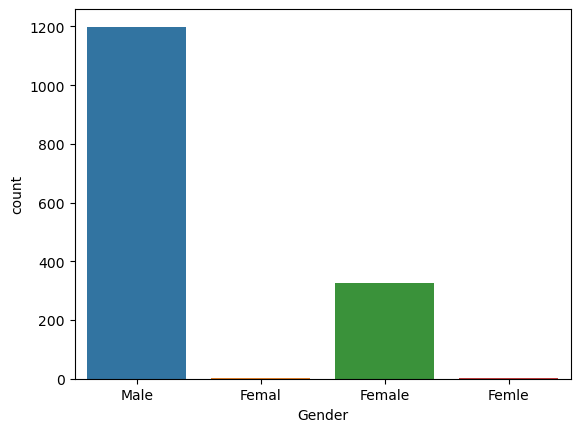

In [13]:
sns.countplot(x=df.Gender);

- Discrepancy in Gender column
    - Only **Male** and **Female** values are valid.
    - But from countplot, we can see incorrect values like **Femal** and **Femle**

In [14]:
df.Gender.value_counts(normalize=True)

Male      0.784686
Female    0.214005
Femal     0.000654
Femle     0.000654
Name: Gender, dtype: float64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [16]:
df.describe(include='object').T

,count,unique,top,freq
Gender,1528,4,Male,1199
Profession,1581,2,Salaried,896
Marital_status,1581,2,Married,1443
Education,1581,2,Post Graduate,985
Personal_loan,1581,2,Yes,792
House_loan,1581,2,No,1054
Partner_working,1581,2,Yes,868
Make,1581,3,Sedan,702


- Numerical Stats
    - Total Salary feature has maximum value to very high, there can be potential outliers.
    - We can find almost bell curve or normal distribution of the data in features like Age, Salary, Total Salary because the Mean and Median are almost equal here.
- Categorical Stats,
    - Gender has 4 unique values, which is daunting because there could be Male and Female. Bad data might be ingested.
    - Around 79% data in Gender are Males, 91% of customers are Married.

In [20]:
df.House_loan.value_counts(normalize=1)

No     0.666667
Yes    0.333333
Name: House_loan, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

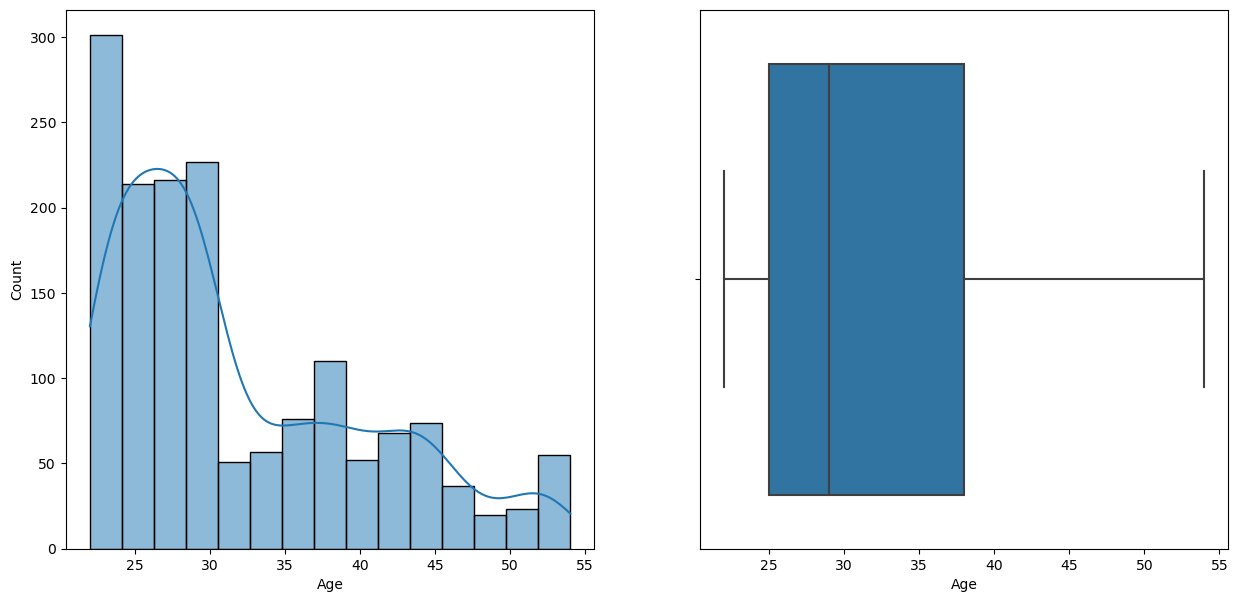

In [22]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(x=df.Age, kde=True)

plt.subplot(1,2,2)
sns.boxplot(x=df.Age);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

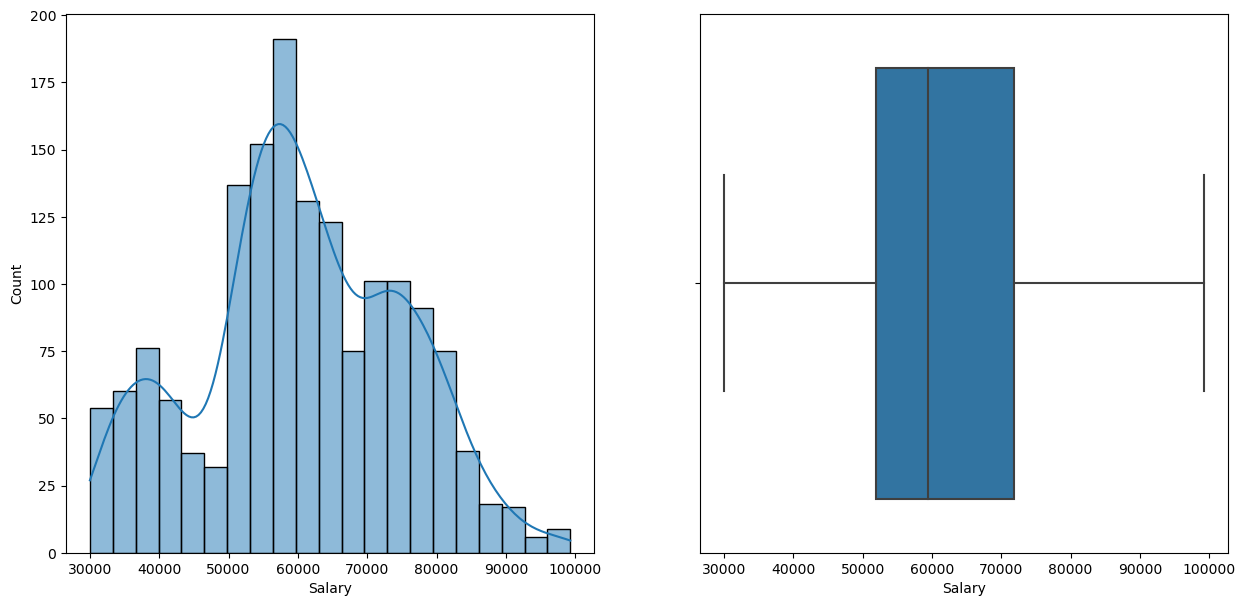

In [23]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(x=df.Salary, kde=True)

plt.subplot(1,2,2)
sns.boxplot(x=df.Salary);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

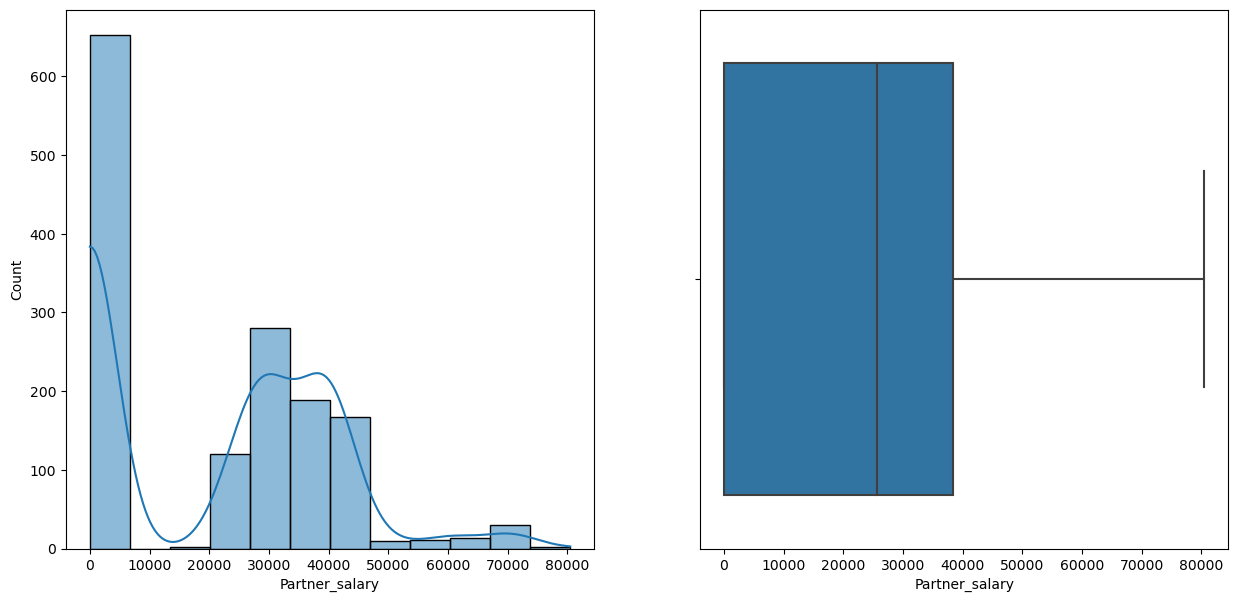

In [24]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(x=df.Partner_salary, kde=True)

plt.subplot(1,2,2)
sns.boxplot(x=df.Partner_salary);

In [25]:
len(df[df.Partner_salary==0])

623

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

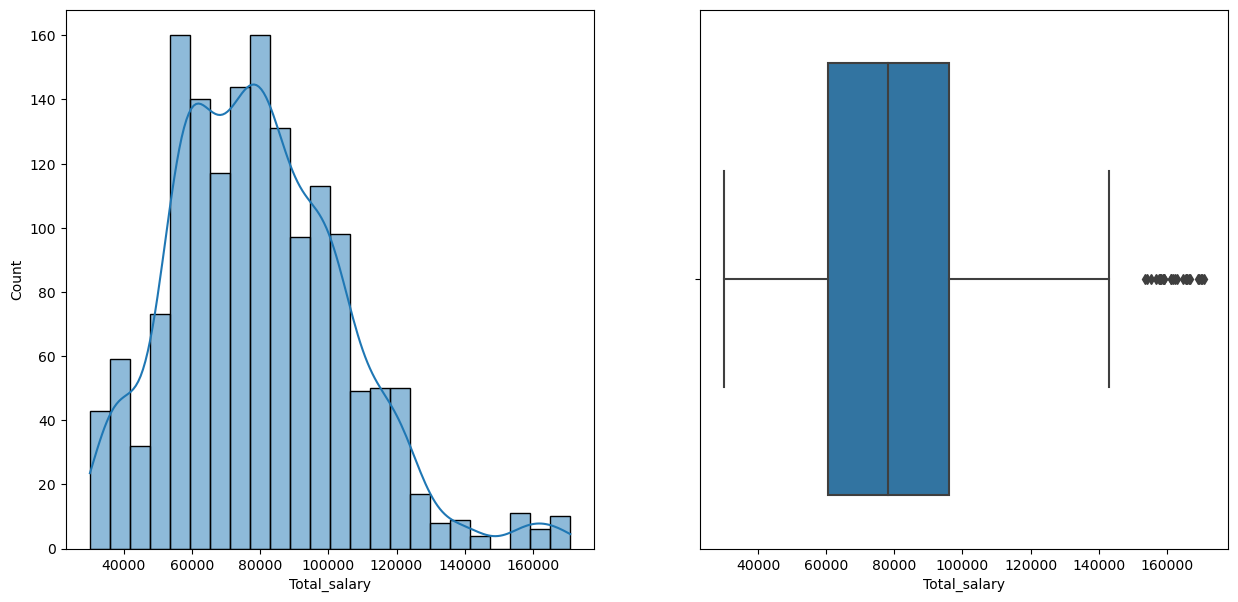

In [26]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(x=df.Total_salary, kde=True)

plt.subplot(1,2,2)
sns.boxplot(x=df.Total_salary);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

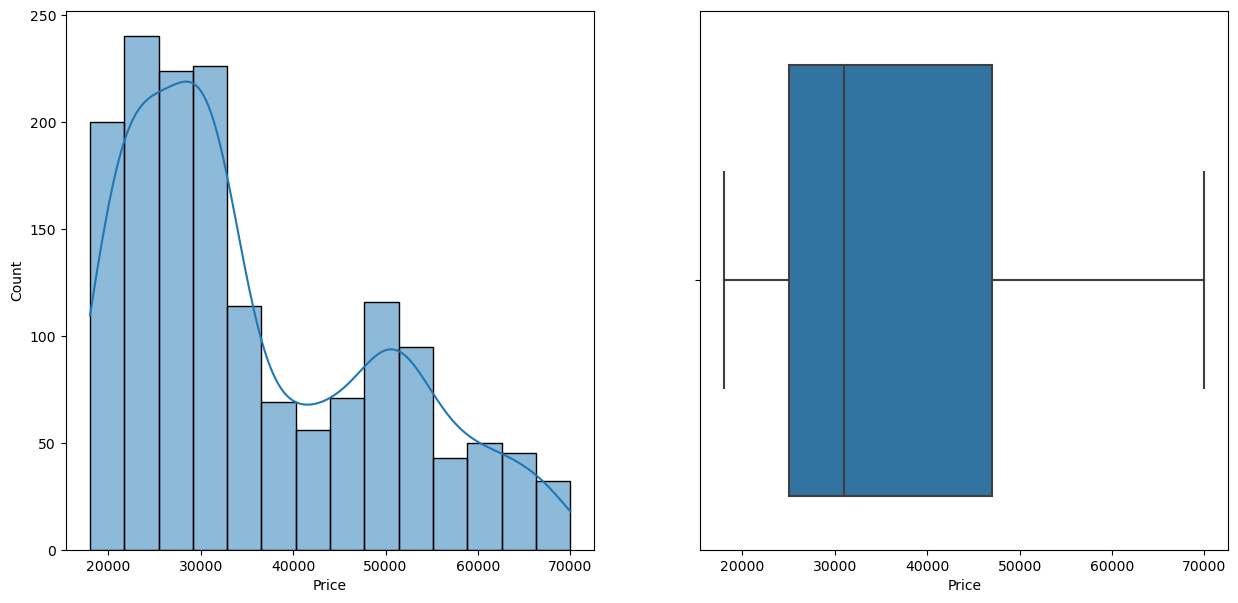

In [27]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(x=df.Price, kde=True)

plt.subplot(1,2,2)
sns.boxplot(x=df.Price);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

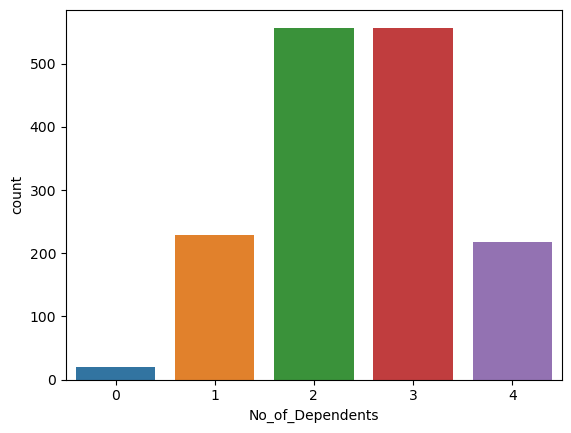

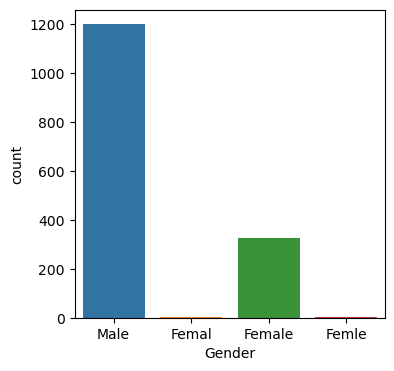

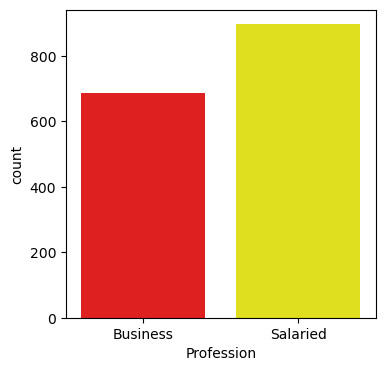

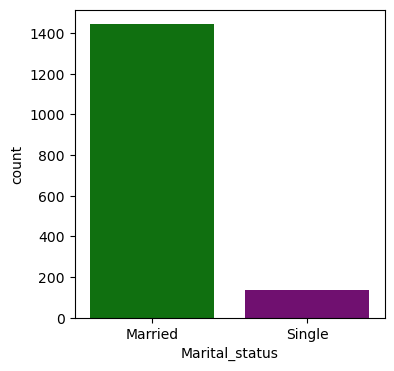

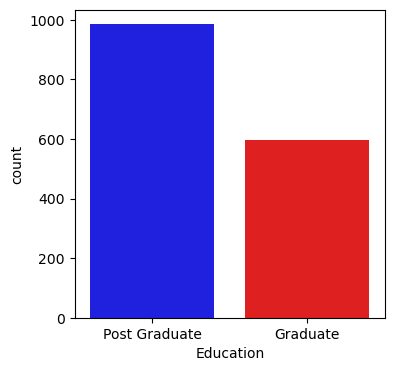

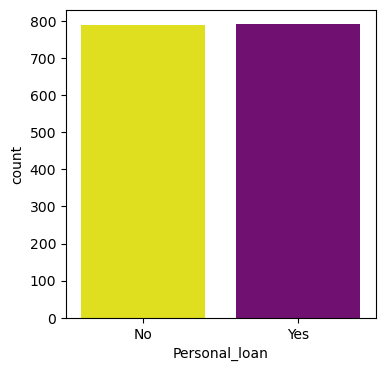

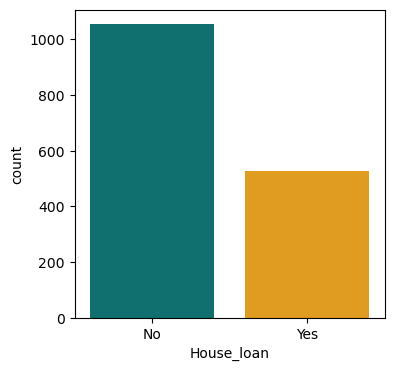

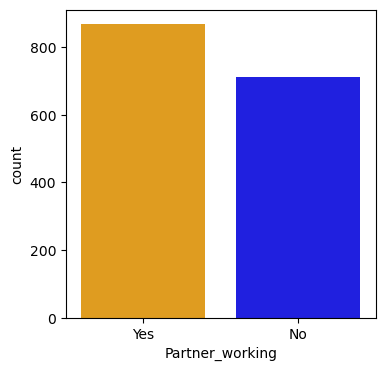

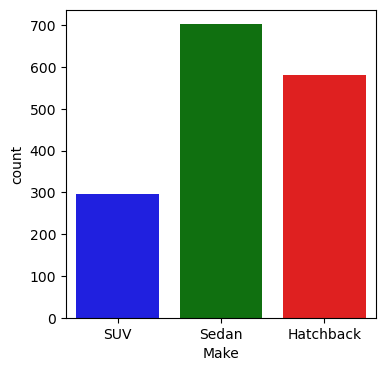

In [28]:
sns.countplot(x=df.No_of_Dependents);

plt.figure(figsize=(4,4))
sns.countplot(x=df.Gender);

plt.figure(figsize=(4,4))
sns.countplot(x=df.Profession, palette = ['Red','Yellow']);

plt.figure(figsize=(4,4))
sns.countplot(x=df.Marital_status, palette = ['Green','Purple']);

plt.figure(figsize=(4,4))
sns.countplot(x=df.Education, palette = ['Blue','Red']);

plt.figure(figsize=(4,4))
sns.countplot(x=df.Personal_loan, palette = ['Yellow','Purple']);

plt.figure(figsize=(4,4))
sns.countplot(x=df.House_loan, palette = ['Teal','Orange']);

plt.figure(figsize=(4,4))
sns.countplot(x=df.Partner_working, palette = ['Orange','Blue']);

plt.figure(figsize=(4,4))
sns.countplot(x=df.Make, palette = ['Blue','Green','Red']);

<IPython.core.display.Javascript object>

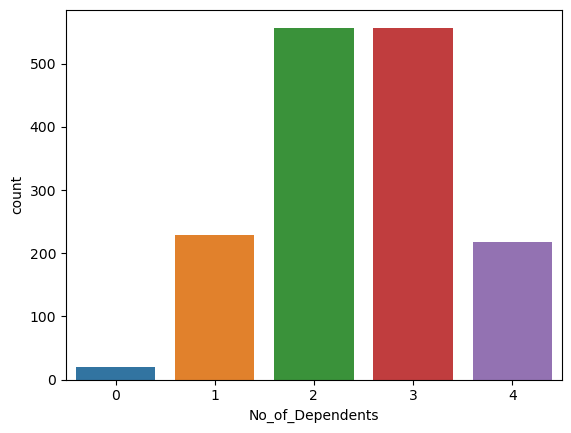

In [29]:
sns.countplot(x=df.No_of_Dependents);

In [30]:
df.describe(include='object').T

,count,unique,top,freq
Gender,1528,4,Male,1199
Profession,1581,2,Salaried,896
Marital_status,1581,2,Married,1443
Education,1581,2,Post Graduate,985
Personal_loan,1581,2,Yes,792
House_loan,1581,2,No,1054
Partner_working,1581,2,Yes,868
Make,1581,3,Sedan,702


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

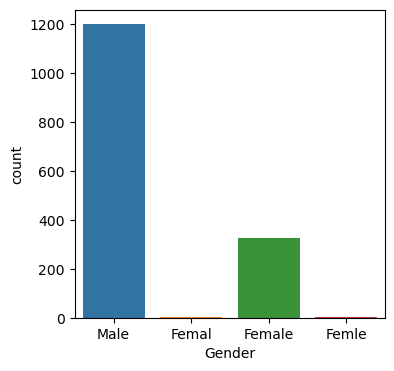

In [32]:
plt.figure(figsize=(4,4))
sns.countplot(x=df.Gender);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

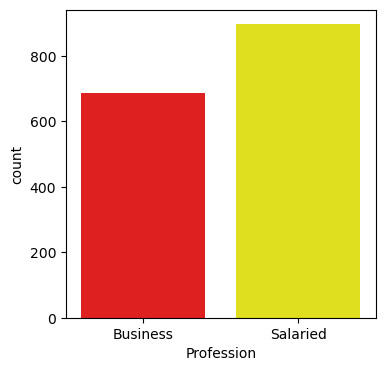

In [33]:
plt.figure(figsize=(4,4))
sns.countplot(x=df.Profession, palette = ['Red','Yellow']);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

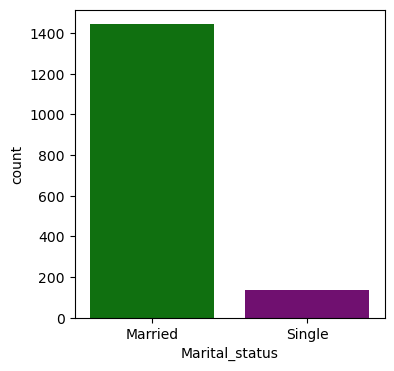

In [34]:
plt.figure(figsize=(4,4))
sns.countplot(x=df.Marital_status, palette = ['Green','Purple']);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

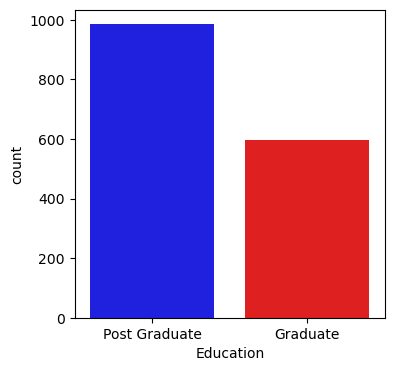

In [35]:
plt.figure(figsize=(4,4))
sns.countplot(x=df.Education, palette = ['Blue','Red']);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

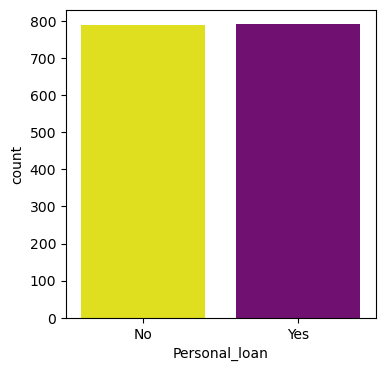

In [36]:
plt.figure(figsize=(4,4))
sns.countplot(x=df.Personal_loan, palette = ['Yellow','Purple']);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

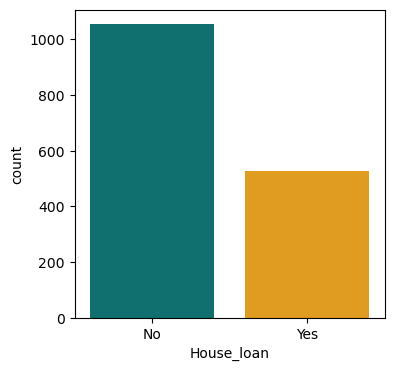

In [37]:
plt.figure(figsize=(4,4))
sns.countplot(x=df.House_loan, palette = ['Teal','Orange']);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

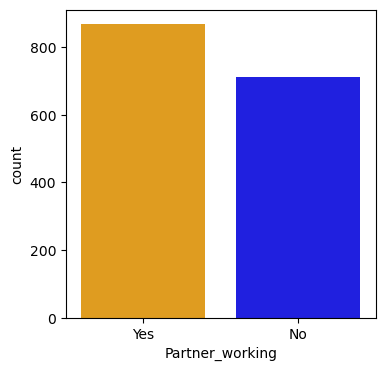

In [38]:
plt.figure(figsize=(4,4))
sns.countplot(x=df.Partner_working, palette = ['Orange','Blue']);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

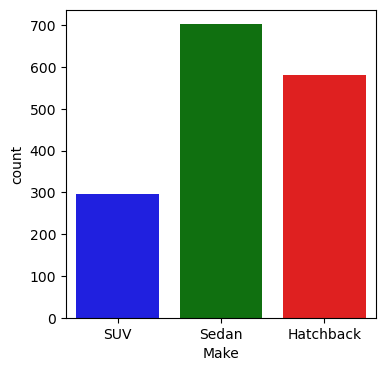

In [39]:
plt.figure(figsize=(4,4))
sns.countplot(x=df.Make, palette = ['Blue','Green','Red']);

In [40]:
df[df.Marital_status=='Single']['Partner_working'].value_counts()

No    138
Name: Partner_working, dtype: int64

In [41]:
df[df.Marital_status=='Single'][['Salary','Partner_salary','Total_salary']]['Partner_salary'].value_counts()

0.0    122
Name: Partner_salary, dtype: int64

In [42]:
df[df.Marital_status=='Single']['Partner_salary'].isna().sum()

16

In [43]:
len(df[df.Marital_status=='Single'])

138

- Basic Sanity check around Partner salary and Marital Status,
    - There are in total 138 single users, which means no partner i.e partner working is NO in total 138 rows.
    - Simiarly, the 138 single users should have partner salary as zero (0). There are 122 rows with 0 value but 16 rows having null values, which should be marked as zero only.
    - No descripancy in Partner salary, Marital status, Partner working columns. Which is a good sign.

- Treat Bad data and outliers
    - Outliers - Total salary
    - Bad data - Gender

In [44]:
df.Gender.value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In [45]:
df.Gender.replace({'Femal':'Female', 'Femle':'Female'}, inplace=True)

In [46]:
df.Gender.value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

In [47]:
def IQR(col):
    q1,q3  = np.quantile(col,[0.25,0.75])
    iqr = q3-q1
    ul = q3+(1.5*iqr)
    ll = q1-(1.5*iqr)
    return (ll, ul)

In [48]:
IQR(df.Total_salary)

<IPython.core.display.Javascript object>

(7400.0, 149000.0)

In [49]:
len(df[df.Total_salary>149000.0])

27

In [50]:
df[df.Total_salary>149000.0]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
17,49,Female,Salaried,Married,Post Graduate,4,No,No,Yes,95100,70600.0,165700,64000,SUV
18,49,Female,Business,Married,Post Graduate,3,No,No,Yes,92600,70300.0,162900,58000,SUV
19,49,Male,Salaried,Married,Post Graduate,3,Yes,No,Yes,98400,60600.0,159000,54000,SUV
29,46,Female,Salaried,Married,Post Graduate,2,No,No,Yes,98300,70700.0,169000,61000,SUV
30,46,Male,Salaried,Married,Post Graduate,4,No,No,Yes,94900,70700.0,165600,67000,SUV
31,46,Male,Business,Married,Graduate,2,Yes,No,Yes,91100,70000.0,161100,66000,SUV
41,53,Female,Salaried,Married,Post Graduate,4,No,No,Yes,96600,70300.0,166900,66000,SUV


- Will impute first because lowering total salary because upper limit will effect on Partner salary = Total salary - salary. 
- After imputation of Partner salary, then will treat outliers for Total salary column

- Imputation
    - Partner salary - put zeroes or tot_sal - sal at required conditions.
    - Gender - use mode i.e. Male (Use norm=True to justify)

In [51]:
df[df.Partner_salary.isna()].Marital_status.value_counts()

Married    90
Single     16
Name: Marital_status, dtype: int64

In [52]:
df[df.Partner_salary.isna()].Partner_working.value_counts()

No     90
Yes    16
Name: Partner_working, dtype: int64

In [53]:
df[df.Partner_salary.isna()][['Marital_status','Partner_working']]

,Marital_status,Partner_working
40,Married,No
43,Married,Yes
49,Married,Yes
59,Married,Yes
111,Married,Yes
...,...,...
1559,Married,No
1567,Single,No
1568,Married,No
1577,Married,No


In [54]:
df[(df.Marital_status=='Single') & (df.Partner_working=='Yes')]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [55]:
df[(df.Marital_status=='Single') & (df.Partner_salary>0)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


- Basic sanity checks

In [56]:
df[(df.Partner_salary.isna()) & (df.Marital_status=='Single')]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
241,43,Male,Salaried,Single,Graduate,2,Yes,No,No,53300,NaN,53300,33000,Sedan
361,39,Male,Business,Single,Post Graduate,1,No,No,No,71800,NaN,71800,54000,Sedan
366,39,Male,Salaried,Single,Graduate,1,Yes,Yes,No,59500,NaN,59500,55000,Sedan
473,36,Female,Salaried,Single,Graduate,2,Yes,No,No,47300,NaN,47300,66000,SUV
803,29,Male,Business,Single,Post Graduate,2,No,No,No,73100,NaN,73100,23000,Hatchback
826,29,Male,Salaried,Single,Post Graduate,0,Yes,Yes,No,62300,NaN,62300,20000,Hatchback
829,29,Female,Salaried,Single,Post Graduate,2,No,No,No,58200,NaN,58200,43000,Sedan
936,28,Male,Business,Single,Post Graduate,0,No,Yes,No,66300,NaN,66300,22000,Hatchback
965,28,Male,Business,Single,Graduate,2,Yes,Yes,No,43500,NaN,43500,27000,Hatchback
1051,27,Male,Salaried,Single,Post Graduate,1,Yes,No,No,62700,NaN,62700,26000,Hatchback


In [57]:
single_with_null_sal = df[(df.Partner_salary.isna()) & (df.Marital_status=='Single')].index.to_list()

In [58]:
df.loc[single_with_null_sal,'Partner_salary'] = 0

In [59]:
df[(df.Partner_salary.isna()) & (df.Marital_status=='Single')]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [60]:
def fun(l):
    print(type(l))
    print(l[:5])

In [61]:
df[(df.Partner_salary.isna()) & (df.Partner_working=='No')]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
40,53,Female,Salaried,Married,Graduate,1,Yes,No,No,72100,NaN,72100,60000,SUV
115,48,Female,Salaried,Married,Post Graduate,3,No,No,No,78000,NaN,78000,59000,SUV
163,45,Male,Salaried,Married,Post Graduate,1,Yes,Yes,No,71300,NaN,71300,42000,Sedan
164,45,Male,Business,Married,Graduate,1,Yes,No,No,56700,NaN,56700,54000,Sedan
165,45,Male,Salaried,Married,Graduate,2,No,No,No,55100,NaN,55100,65000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,22,Male,Salaried,Married,Post Graduate,3,No,No,No,53700,NaN,53700,25000,Hatchback
1559,22,Male,Business,Married,Post Graduate,3,Yes,No,No,52100,NaN,52100,28000,Hatchback
1568,22,Male,Salaried,Married,Graduate,3,No,Yes,No,38000,NaN,38000,23000,Sedan
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback


In [62]:
df[(df.Partner_salary.isna()) & (df.Partner_working=='No')][(df.Total_salary!=df.Salary)]

C:\Users\pranai\AppData\Local\Temp\ipykernel_19796\2475876229.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(df.Partner_salary.isna()) & (df.Partner_working=='No')][(df.Total_salary!=df.Salary)]


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [63]:
df[(df.Partner_salary.isna()) & (df.Partner_working=='Yes')]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV
209,43,Female,Salaried,Married,Graduate,4,Yes,No,Yes,53400,NaN,123900,64000,SUV
284,41,Female,Business,Married,Post Graduate,2,No,No,Yes,70500,NaN,105800,33000,Sedan
339,39,Male,Salaried,Married,Post Graduate,2,Yes,No,Yes,76800,NaN,115400,50000,Sedan
376,38,Male,Salaried,Married,Post Graduate,2,Yes,No,Yes,79000,NaN,117400,46000,Sedan
424,37,Female,Salaried,Married,Graduate,2,Yes,Yes,Yes,62000,NaN,100700,46000,Sedan
444,36,Male,Business,Married,Post Graduate,2,No,No,Yes,72300,NaN,112400,48000,Sedan


In [64]:
part_work_sal_null = df[(df.Partner_salary.isna()) & (df.Partner_working=='No')].index.to_list()

In [65]:
df.loc[part_work_sal_null,'Partner_salary'] = 0

In [66]:
df[(df.Partner_salary.isna()) & (df.Partner_working=='No')]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [67]:
df[df.Partner_salary.isna()]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV
209,43,Female,Salaried,Married,Graduate,4,Yes,No,Yes,53400,NaN,123900,64000,SUV
284,41,Female,Business,Married,Post Graduate,2,No,No,Yes,70500,NaN,105800,33000,Sedan
339,39,Male,Salaried,Married,Post Graduate,2,Yes,No,Yes,76800,NaN,115400,50000,Sedan
376,38,Male,Salaried,Married,Post Graduate,2,Yes,No,Yes,79000,NaN,117400,46000,Sedan
424,37,Female,Salaried,Married,Graduate,2,Yes,Yes,Yes,62000,NaN,100700,46000,Sedan
444,36,Male,Business,Married,Post Graduate,2,No,No,Yes,72300,NaN,112400,48000,Sedan


In [68]:
impute_part_sal = df[df.Partner_salary.isna()].index.to_list()

In [69]:
df.Partner_salary.fillna(df.Total_salary - df.Salary, inplace=True)

In [70]:
df[df.Partner_salary.isna()]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [77]:
df.Partner_salary.isna().sum()

0

In [71]:
df.Gender.isna().sum()

53

In [72]:
df.Gender.value_counts(normalize=True)

Male      0.784686
Female    0.215314
Name: Gender, dtype: float64

In [73]:
df.Partner_working.value_counts(normalize=True)

Yes    0.54902
No     0.45098
Name: Partner_working, dtype: float64

In [74]:
df.Gender.fillna(df.Gender.mode()[0], inplace=True)

In [75]:
df.isna().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

- Treat outliers

In [78]:
IQR(df.Total_salary)

<IPython.core.display.Javascript object>

(7400.0, 149000.0)

In [79]:
df[df.Total_salary>149000.0]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
17,49,Female,Salaried,Married,Post Graduate,4,No,No,Yes,95100,70600.0,165700,64000,SUV
18,49,Female,Business,Married,Post Graduate,3,No,No,Yes,92600,70300.0,162900,58000,SUV
19,49,Male,Salaried,Married,Post Graduate,3,Yes,No,Yes,98400,60600.0,159000,54000,SUV
29,46,Female,Salaried,Married,Post Graduate,2,No,No,Yes,98300,70700.0,169000,61000,SUV
30,46,Male,Salaried,Married,Post Graduate,4,No,No,Yes,94900,70700.0,165600,67000,SUV
31,46,Male,Business,Married,Graduate,2,Yes,No,Yes,91100,70000.0,161100,66000,SUV
41,53,Female,Salaried,Married,Post Graduate,4,No,No,Yes,96600,70300.0,166900,66000,SUV


In [80]:
df.Total_salary = np.where(df.Total_salary>149000,149000,df.Total_salary)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

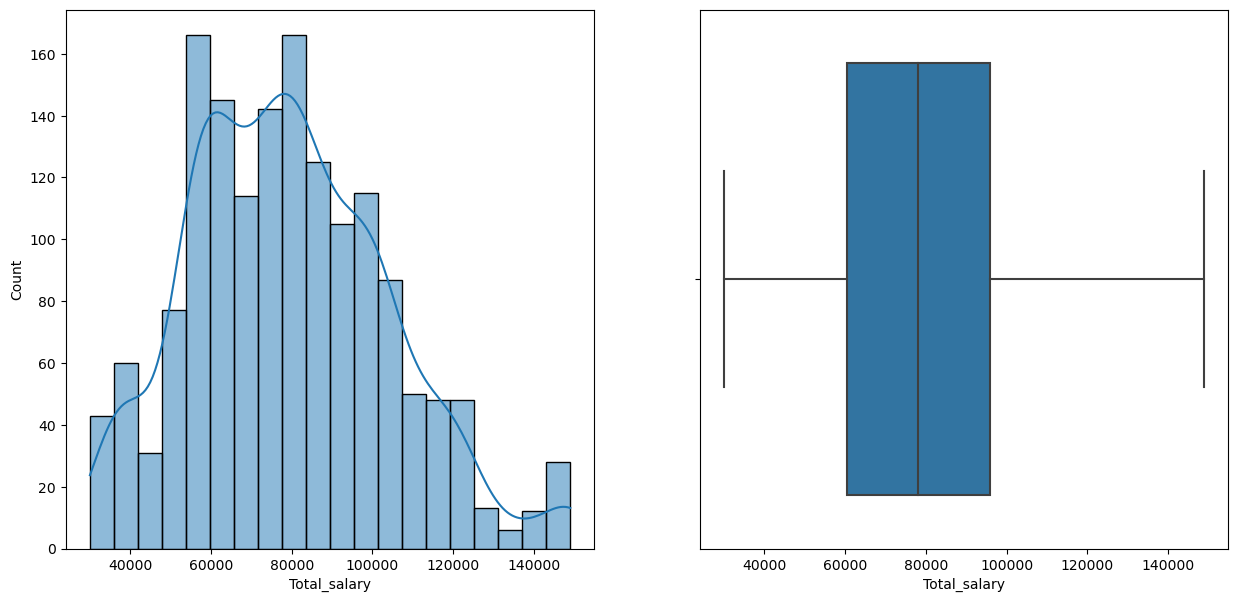

In [81]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(x=df.Total_salary, kde=True)

plt.subplot(1,2,2)
sns.boxplot(x=df.Total_salary);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

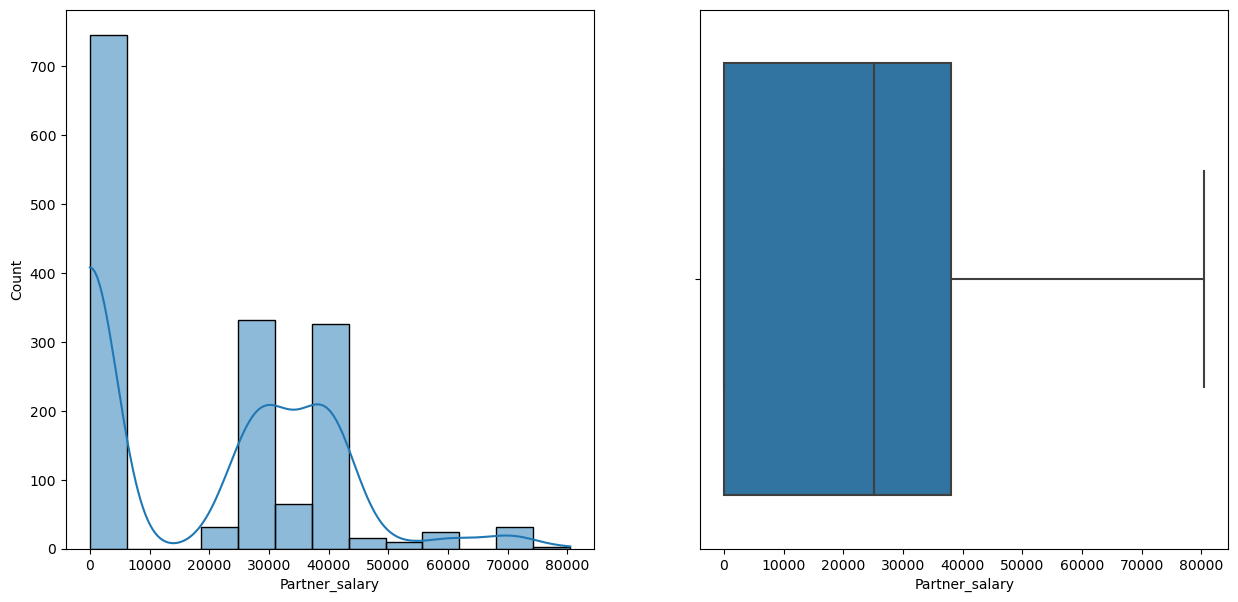

In [82]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(x=df.Partner_salary, kde=True)

plt.subplot(1,2,2)
sns.boxplot(x=df.Partner_salary);

In [83]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

### Univariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

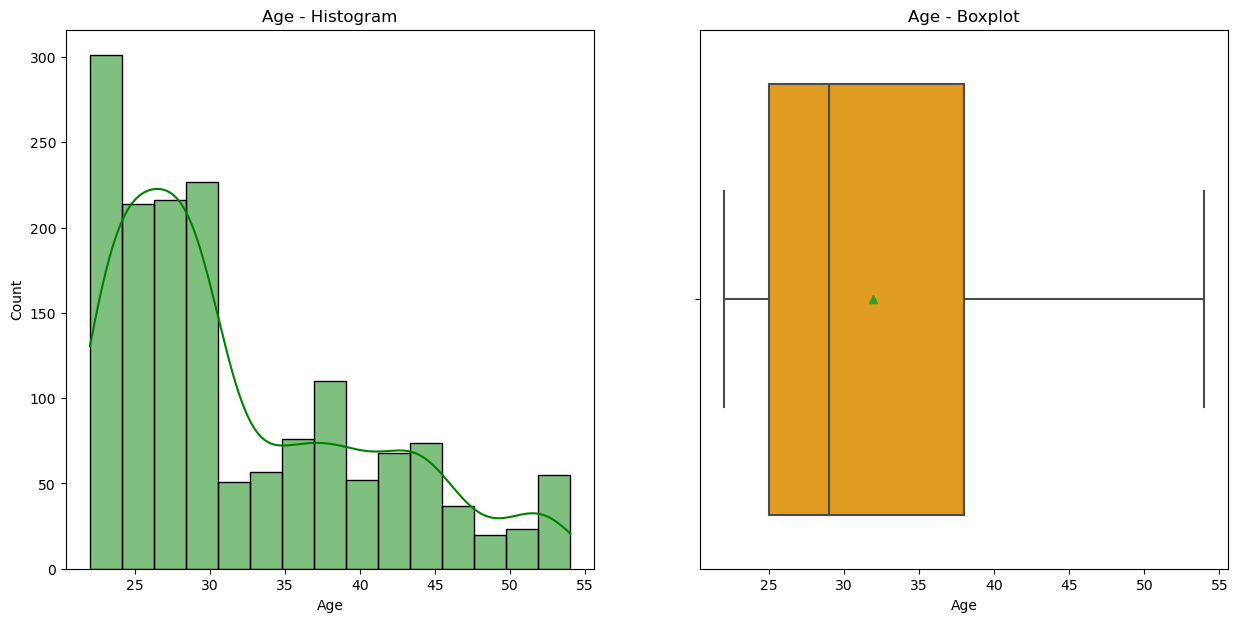

In [84]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(x=df.Age, kde=True,color='g')
plt.title('Age - Histogram')

plt.subplot(1,2,2)
sns.boxplot(x=df.Age, color='orange', showmeans=True)
plt.title('Age - Boxplot');

In [85]:
df.Age.describe().T

count    1581.000000
mean       31.922201
std         8.425978
min        22.000000
25%        25.000000
50%        29.000000
75%        38.000000
max        54.000000
Name: Age, dtype: float64

- 75% of the customers under the age < 40 are interested in buying cars. Good insight to pitch special offers for customers in this cluster.
- From Histogram, Lots of customers from age between 22 to 30 are shown, Assuming young customers cracking first job and planning for a car immediately is a dream/goal. We can revamp our old models and provide better offers/discounts for recent old model cars to target younger generation as they might don't have high salaries. 
- Data Interpretation,
    - Data is Right/Positively skewed.
    - No outliers. Mean is lil high than Median due to right skewed.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

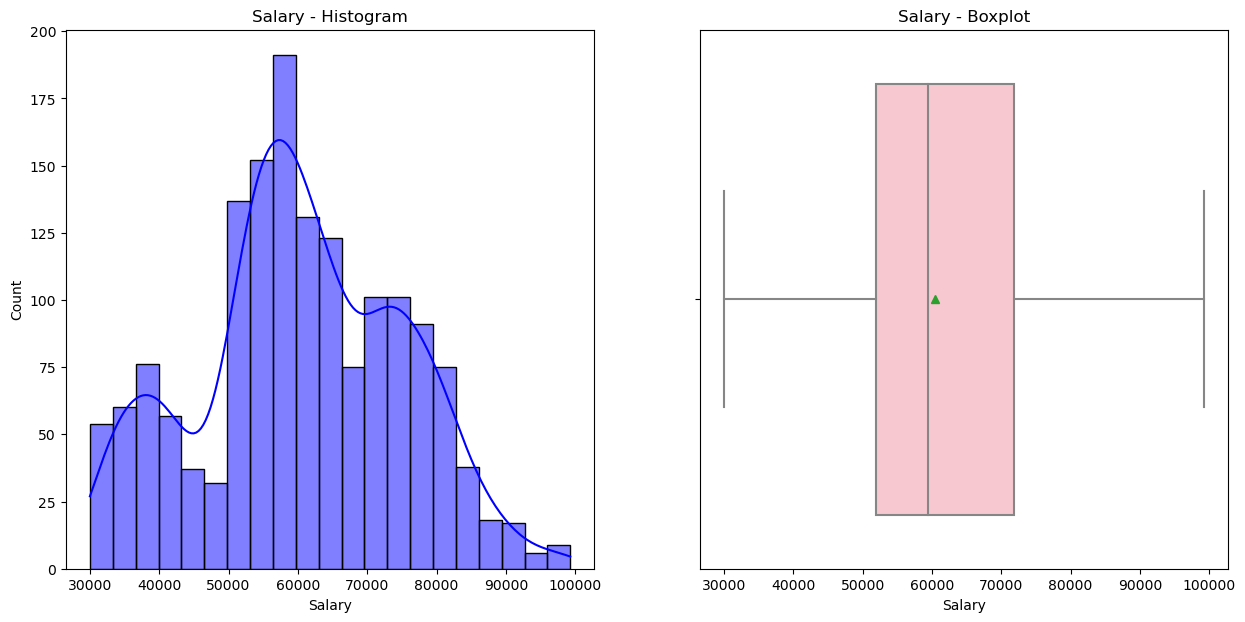

In [86]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(x=df.Salary, kde=True,color='blue')
plt.title('Salary - Histogram')

plt.subplot(1,2,2)
sns.boxplot(x=df.Salary, color='pink', showmeans=True)
plt.title('Salary - Boxplot');

- Data Interpretition,
    - Salary Data is almost symmetrical in shape.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

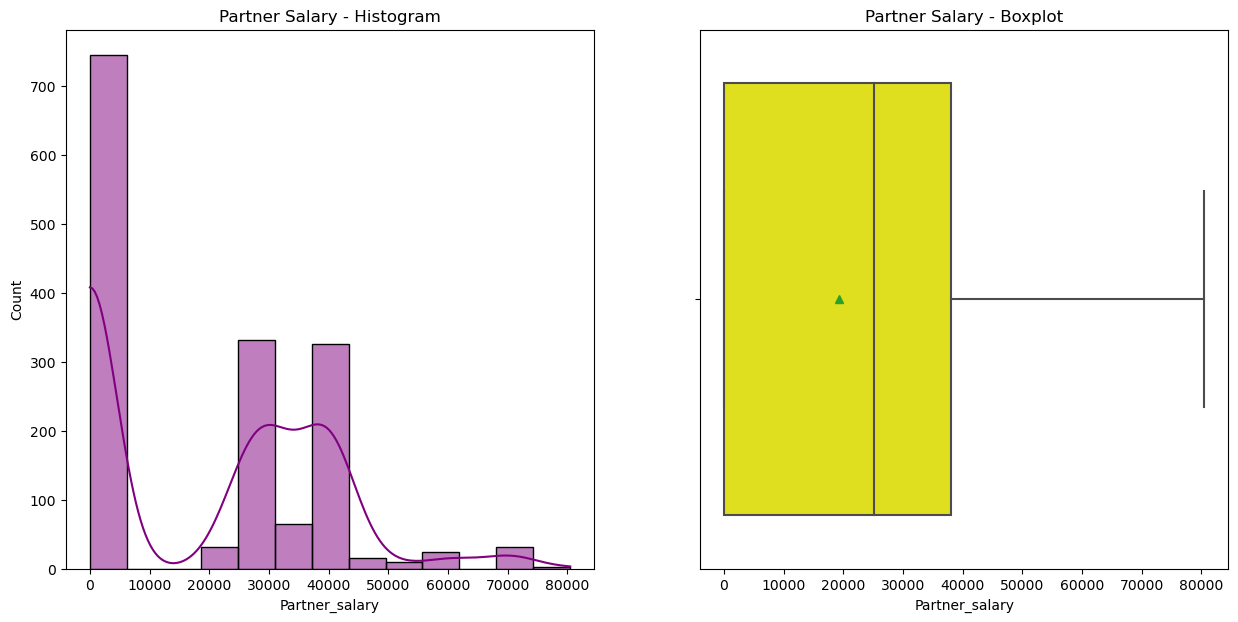

In [87]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(x=df.Partner_salary, kde=True,color='Purple')
plt.title('Partner Salary - Histogram')

plt.subplot(1,2,2)
sns.boxplot(x=df.Partner_salary, color='Yellow', showmeans=True)
plt.title('Partner Salary - Boxplot');

- There are around 45% customers don't have a Working Partner to provide financial stability.
- Simiarly, There are around 8.7% customers are single, who don't have a Partner.
- From the above 2 points, it is understood that there are customers with No Partner or Has Partner but not working, Which led to lots of zero (0) salary for partner in the Histogram.
- On contrast, 55% customers have a Working Partner so it's better to target customers who has financial support from partner which can lead to purchase expensive or High-end cars in the market.
- Data Interpretation,
    - Data is completely scrambled and no proper distribution is observed

In [88]:
df.Partner_working.value_counts(normalize=True)

Yes    0.54902
No     0.45098
Name: Partner_working, dtype: float64

In [89]:
df.Marital_status.value_counts(normalize=True)

Married    0.912713
Single     0.087287
Name: Marital_status, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

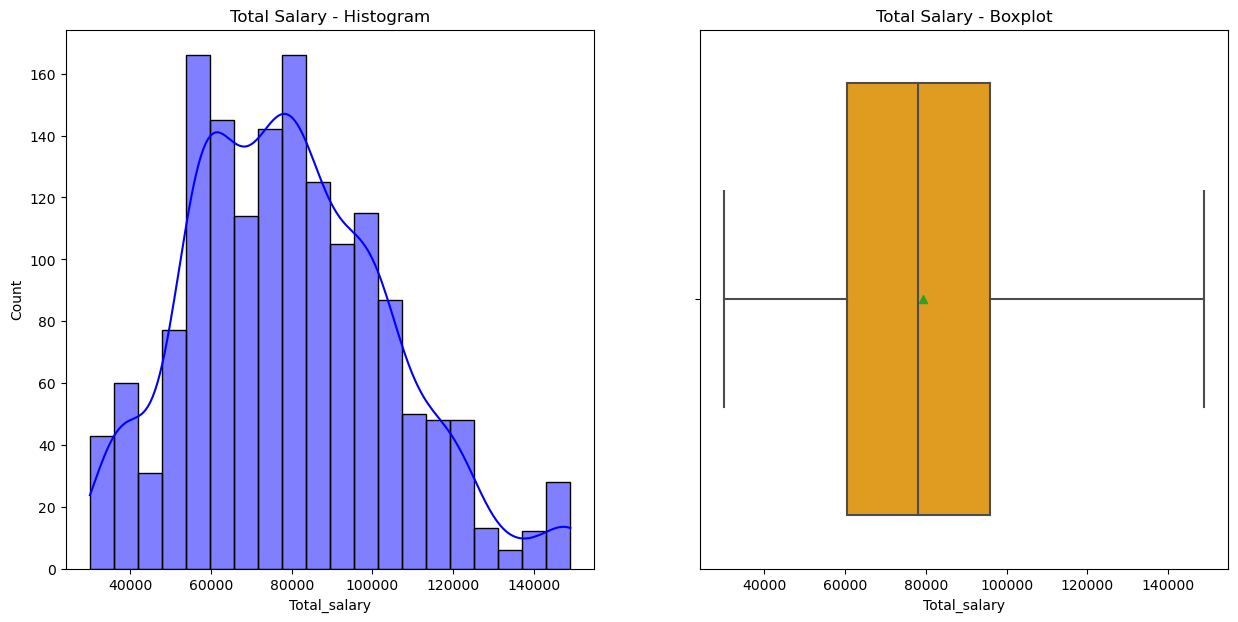

In [90]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(x=df.Total_salary, kde=True,color='Blue')
plt.title('Total Salary - Histogram')

plt.subplot(1,2,2)
sns.boxplot(x=df.Total_salary, color='Orange', showmeans=True)
plt.title('Total Salary - Boxplot');

In [91]:
df.Total_salary.describe()

count      1581.000000
mean      79398.545225
std       24849.147996
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      149000.000000
Name: Total_salary, dtype: float64

- As per data, The mean(79k) and median(78k) total salary is around 80k(say). But starting 25% of the customers has total salary around 60k. We can target customers whose salary < 60k or falls into 25% of our data with better offers/discounts during festivals to increase sales.
- Data Interpretation,
    - Total Salary Data is very close to Symmetrical data i.e. Bell curve in shape.
    - Which can be proven from Mean around 79k and Median around 78k.

In [92]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

sns.countplot(x=df.No_of_Dependents);

plt.figure(figsize=(4,4))
sns.countplot(x=df.Gender);

plt.figure(figsize=(4,4))
sns.countplot(x=df.Profession, palette = ['Red','Yellow']);

plt.figure(figsize=(4,4))
sns.countplot(x=df.Marital_status, palette = ['Green','Purple']);

plt.figure(figsize=(4,4))
sns.countplot(x=df.Education, palette = ['Blue','Red']);

plt.figure(figsize=(4,4))
sns.countplot(x=df.Personal_loan, palette = ['Yellow','Purple']);

plt.figure(figsize=(4,4))
sns.countplot(x=df.House_loan, palette = ['Teal','Orange']);

plt.figure(figsize=(4,4))
sns.countplot(x=df.Partner_working, palette = ['Orange','Blue']);

plt.figure(figsize=(4,4))
sns.countplot(x=df.Make, palette = ['Blue','Green','Red']);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

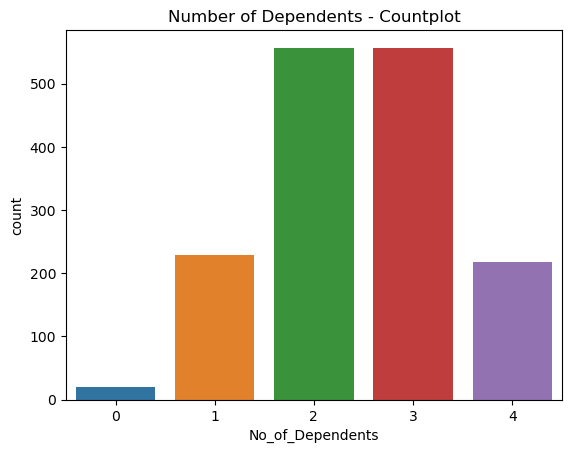

In [101]:
plt.title('Number of Dependents - Countplot')
sns.countplot(x=df.No_of_Dependents);

In [94]:
df.No_of_Dependents.value_counts()

3    557
2    557
1    229
4    218
0     20
Name: No_of_Dependents, dtype: int64

In [95]:
df.No_of_Dependents.value_counts(normalize=True)

3    0.352309
2    0.352309
1    0.144845
4    0.137887
0    0.012650
Name: No_of_Dependents, dtype: float64

- Most of the customers has equal No. of Dependents i.e. 2 and 3 which is around 71% in total for both categories.
- Customers having 2 or 3 dependents might be thinking of purchasing a car as it would be easy for travelling for whole family. Hence targetting customers having dependents will be a great choice.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

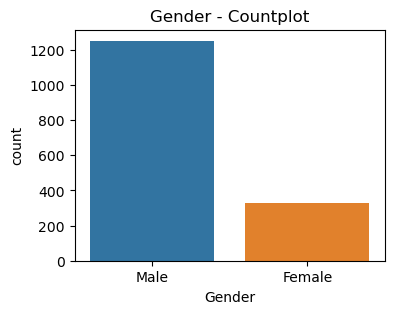

In [102]:
plt.figure(figsize=(4,3))
sns.countplot(x=df.Gender)
plt.title('Gender - Countplot');

In [99]:
df.Gender.value_counts(normalize=True)

Male      0.791904
Female    0.208096
Name: Gender, dtype: float64

- There are around 79% Male customers in the dataset, which implies Male are potential reason behind sales.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

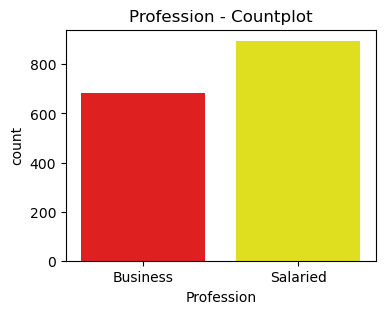

In [103]:
plt.figure(figsize=(4,3))
sns.countplot(x=df.Profession, palette = ['Red','Yellow'])
plt.title('Profession - Countplot');

In [105]:
df.Profession.value_counts(normalize=True)

Salaried    0.56673
Business    0.43327
Name: Profession, dtype: float64

- It's almost equalled that there are 56.6% Salaried customers and 43.4% Business customers, where Salaried customers slightly higher than Business customers.
- No hard rule that only Business customers or Salaried customers are interested in buying cars.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

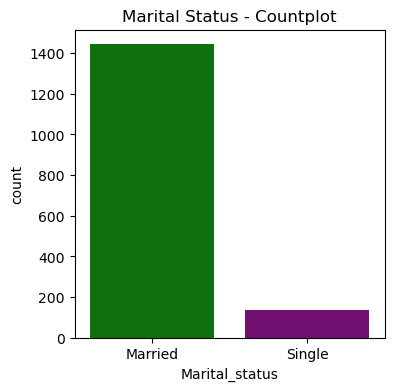

In [106]:
plt.figure(figsize=(4,4))
sns.countplot(x=df.Marital_status, palette = ['Green','Purple'])
plt.title('Marital Status - Countplot');

In [107]:
df.Marital_status.value_counts(normalize=True)

Married    0.912713
Single     0.087287
Name: Marital_status, dtype: float64

- Around 91% of the customers are Married from our dataset, which implies Married customers are tend to have Small/Big Family and having a car would be an ideal goal for transportation.
- Targeting Married customers will have good impact on Sales because Customer's partner might also be working and provides financial stability which adds more reason to buy a car.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

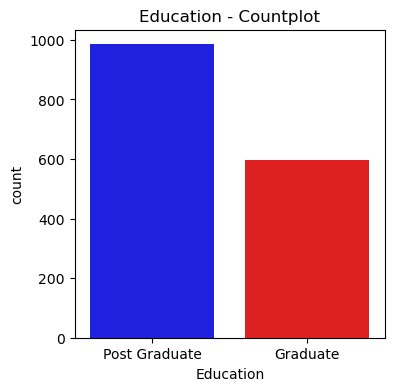

In [109]:
plt.figure(figsize=(4,4))
sns.countplot(x=df.Education, palette = ['Blue','Red'])
plt.title('Education - Countplot');

In [110]:
df.Education.value_counts(normalize=True)

Post Graduate    0.623023
Graduate         0.376977
Name: Education, dtype: float64

- Post Graduates are high in number i.e. around 62% from our dataset. Which implies, Customers pursued Post Graduation tend to have better or high paying Jobs compared to Graduates and hence they tend to invest some amount in buying a car.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

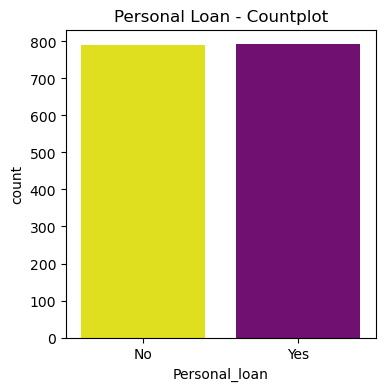

In [111]:
plt.figure(figsize=(4,4))
sns.countplot(x=df.Personal_loan, palette = ['Yellow','Purple'])
plt.title('Personal Loan - Countplot');

In [112]:
df.Personal_loan.value_counts(normalize=True)

Yes    0.500949
No     0.499051
Name: Personal_loan, dtype: float64

- No assumption can be made if a customer can buy a car given the customer has Personal Loan or not.
- There's almost 50% customers having Personal Loan and 50% doesn't.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

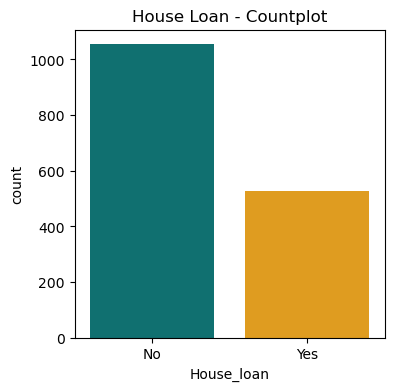

In [113]:
plt.figure(figsize=(4,4))
sns.countplot(x=df.House_loan, palette = ['Teal','Orange'])
plt.title('House Loan - Countplot');

In [114]:
df.House_loan.value_counts(normalize=True)

No     0.666667
Yes    0.333333
Name: House_loan, dtype: float64

- There's a chance that customer not having House Loan can be intended to buy a car compared to those having House Loan.
- From the data, we have 67% customers don't have House Loan and 33% has House Loan.
- It can be interpreted that, Customers who didn't opt for House Loan might have saved enough money to get a new car.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

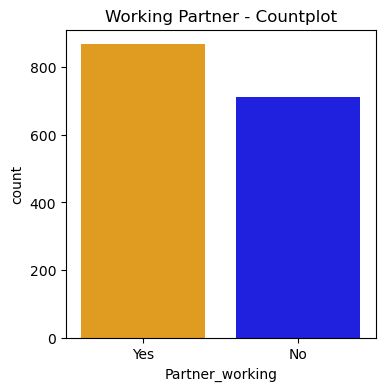

In [115]:
plt.figure(figsize=(4,4))
sns.countplot(x=df.Partner_working, palette = ['Orange','Blue'])
plt.title('Working Partner - Countplot');

In [116]:
df.Partner_working.value_counts(normalize=True)

Yes    0.54902
No     0.45098
Name: Partner_working, dtype: float64

- There's no hard rule whether a working partner tends to increase the chance of buying a new car.
- From the data, we have 55% customers has Working Partner and 45% doesn't.
- We assumed that Customers having working partner will have high chances to purchase a car due to financial support from Partner but from the data we don't interpret that notion. (Point to be noted)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

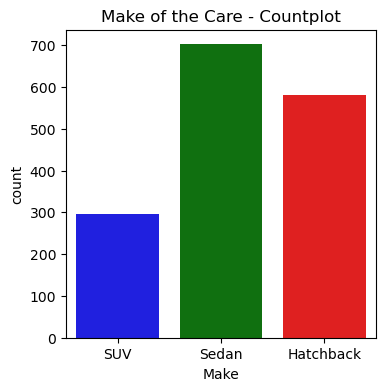

In [117]:
plt.figure(figsize=(4,4))
sns.countplot(x=df.Make, palette = ['Blue','Green','Red'])
plt.title('Make of the Care - Countplot');

In [119]:
df.Make.value_counts(normalize=True)

Sedan        0.444023
Hatchback    0.368121
SUV          0.187856
Name: Make, dtype: float64

- Customers tend to buy Sedan and Hatchback models more when compared to SUV's.

### Bi-Variate Analysis

In [120]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

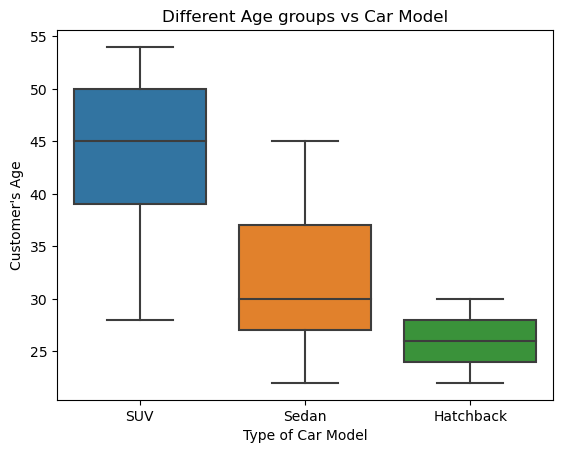

In [121]:
sns.boxplot(x=df.Make, y=df.Age)
plt.title('Different Age groups vs Car Model')
plt.xlabel('Type of Car Model')
plt.ylabel('Customer\'s Age');

- We can find out a pattern that,
    - Customers aged around 38+ are interested in buying SUVs.
    - Customers aged between 27 to 40 are interested in buying Sedan.
    - Customers aged less than 30 are interested in buying Hatchback model.
- Age of the customer will tend to describe more about the purchasing habits about the car model.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

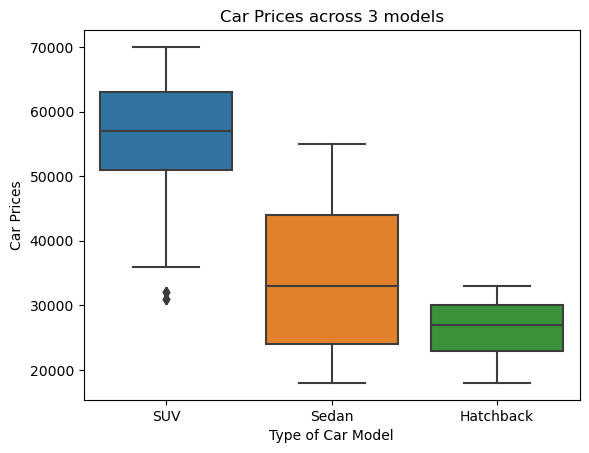

In [122]:
sns.boxplot(x=df.Make, y=df.Price)
plt.title('Car Prices across 3 models')
plt.xlabel('Type of Car Model')
plt.ylabel('Car Prices');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

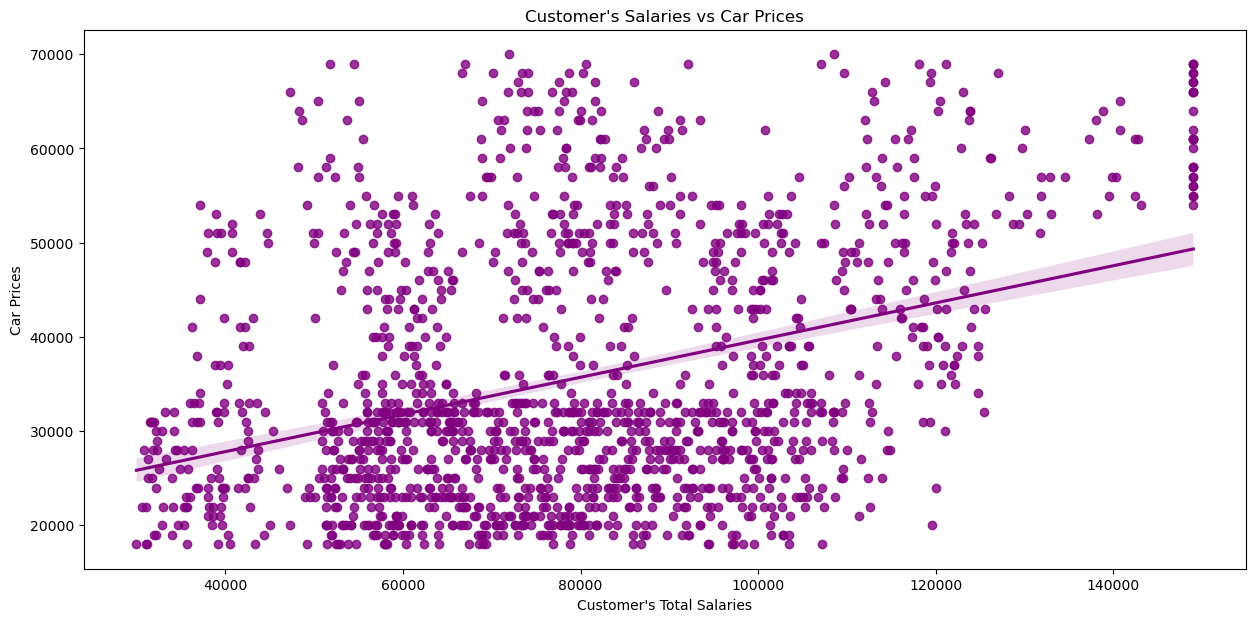

In [123]:
plt.figure(figsize=(15,7))
sns.regplot(x='Total_salary', y='Price', data=df, color='Purple')
plt.title('Customer\'s Salaries vs Car Prices')
plt.xlabel('Customer\'s Total Salaries')
plt.ylabel('Car Prices');

In [124]:
df[['Total_salary','Price']].corr()

,Total_salary,Price
Total_salary,1.000000,0.359651
Price,0.359651,1.000000


- There's a Linear Correlation between the **Total Salaries** of the Customers and **Car Prices**.
- Which can be True that if a customer can invest more money to buy a car then they are expecting to buy an expensive car.
- Alternative is True as well, Because customer's having salaries less will not go beyond their budget and will opt for a cheaper car.
- We can provide better discounts or sales during festival time for Customer's having less salary will try to opt for an expensive car with better sales. (Important Marketing Campaign point)
- Statistically, there's around 36% positive correlation between Total_Salary and Price.

In [125]:
df.Gender.value_counts(normalize=1)

Male      0.791904
Female    0.208096
Name: Gender, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

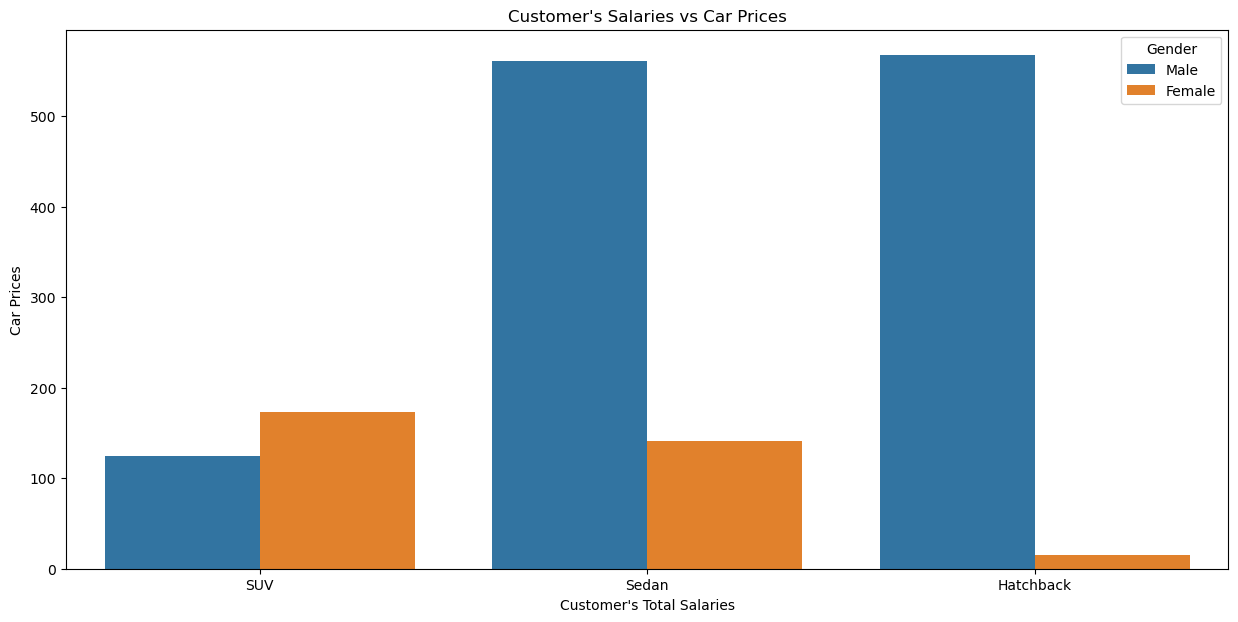

In [126]:
plt.figure(figsize=(15,7))
sns.countplot(x=df.Make, hue=df.Gender)
plt.title('Customer\'s Salaries vs Car Prices')
plt.xlabel('Customer\'s Total Salaries')
plt.ylabel('Car Prices');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

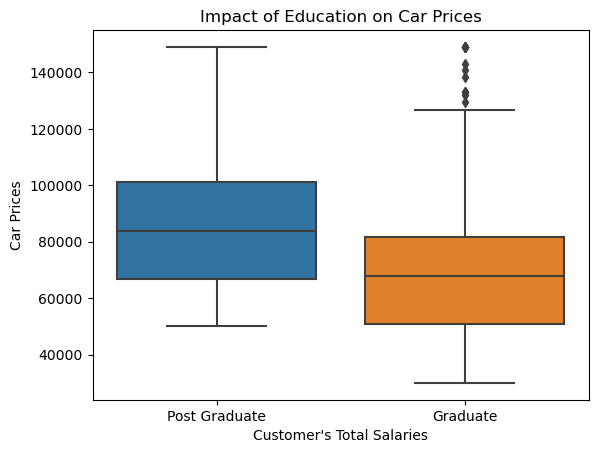

In [173]:
#plt.figure(figsize=(15,7))
sns.boxplot(x=df.Education, y=df.Total_salary)
plt.title('Impact of Education on Car Prices')
plt.xlabel('Customer\'s Total Salaries')
plt.ylabel('Car Prices');

- Post Graduates are high in number i.e. around 62% from our dataset. 
- Which implies, Customers pursued Post Graduation tend to have better or high paying Salaries compared to Graduates which can be seen from the graph.
- Hence, we can target customers with higher education qualification as we've already seen high salaries tend to purchasing expensive cars.

In [128]:
pd.crosstab(index=df.House_loan, columns=df.Personal_loan,margins=1)

<IPython.core.display.Javascript object>

Personal_loan,No,Yes,All
House_loan,,,
No,540,514,1054
Yes,249,278,527
All,789,792,1581


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

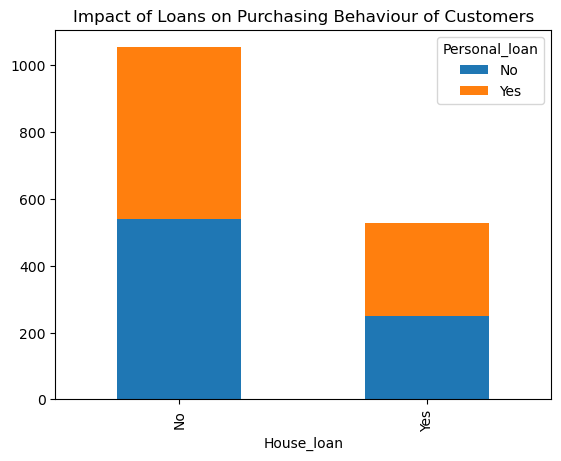

In [129]:
pd.crosstab(index=df.House_loan, columns=df.Personal_loan).plot(kind='bar',stacked=1)
plt.title('Impact of Loans on Purchasing Behaviour of Customers');

- We can interpret that Customers not having Personal Loan and House Loan are in more in number from Graph. Which implies they're tend to opt for a Car having no loans will plan them to invest on Car.

### Multivariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

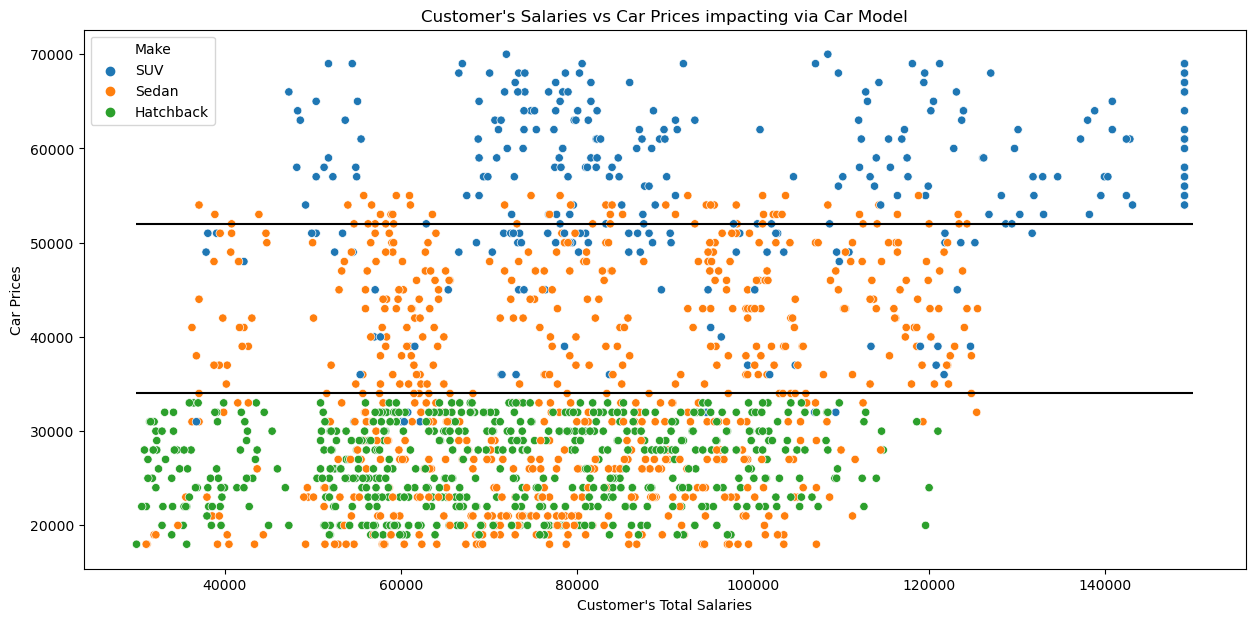

In [130]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df.Total_salary, y=df.Price, hue=df.Make)
plt.title('Customer\'s Salaries vs Car Prices impacting via Car Model')
plt.xlabel('Customer\'s Total Salaries')
plt.ylabel('Car Prices')
plt.hlines(34000,xmin=30000,xmax=150000,color='black')
plt.hlines(52000,xmin=30000,xmax=150000,color='black');

- Earlier, We have seen there's a Positive correlation between the **Total Salaries** of the Customers and **Car Prices**.
- But if we deep dive by adding **Car Model**, we can interpret that:
    - SUVs are super expensive among the all 3 models. And is affordable by more high salaried customers.
    - Hatchback model is quite cheaper and it is attracted by all customers having very low salaries.
    - But Sedan model is dispersed alot in the Graph, Assuming customers with low salaries might go for Sedan model after Hatchback if they're are intended put to more money. But not as high as SUVs range.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

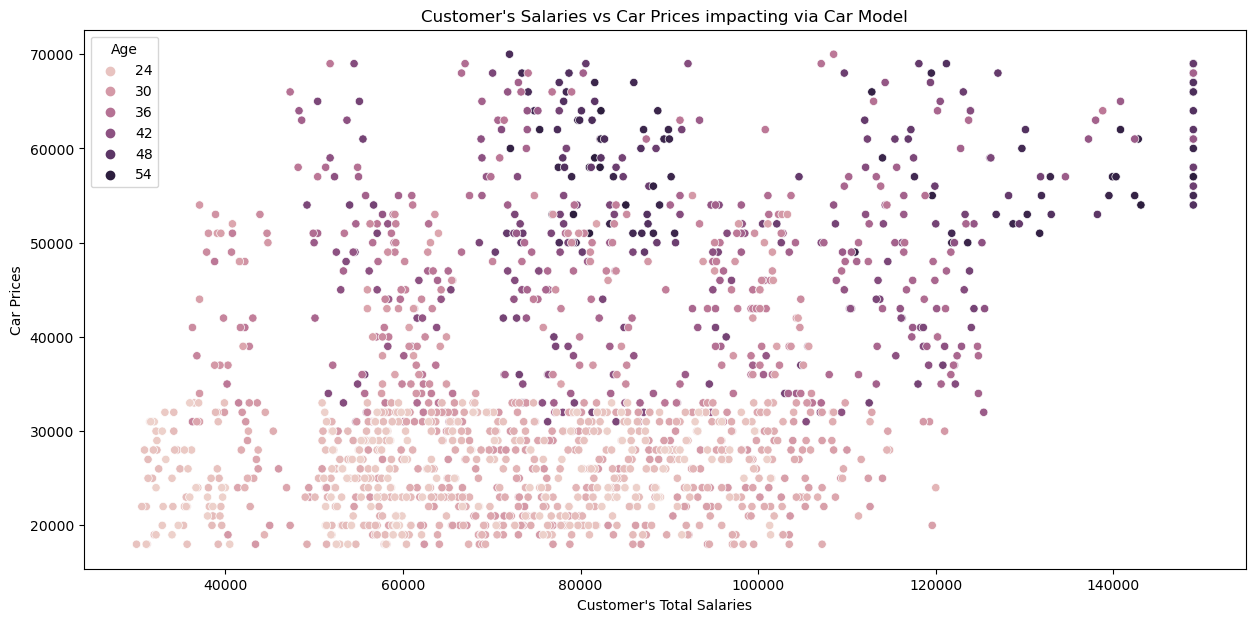

In [131]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df.Total_salary, y=df.Price, hue=df.Age)
plt.title('Customer\'s Salaries vs Car Prices impacting via Car Model')
plt.xlabel('Customer\'s Total Salaries')
plt.ylabel('Car Prices');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

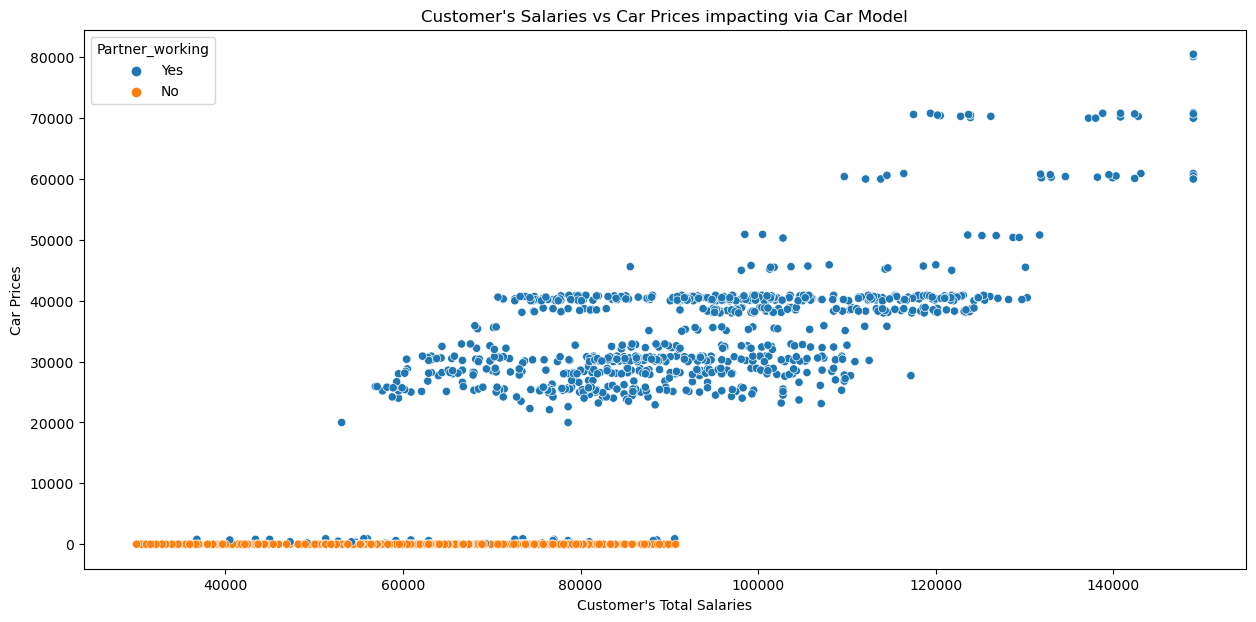

In [132]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df.Total_salary, y=df.Partner_salary, hue=df.Partner_working)
plt.title('Customer\'s Salaries vs Car Prices impacting via Car Model')
plt.xlabel('Customer\'s Total Salaries')
plt.ylabel('Car Prices');

In [133]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\pranai\AppData\Local\Temp\ipykernel_19796\247223834.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.pairplot(df.drop('No_of_Dependents',1));


<Figure size 1200x1200 with 0 Axes>

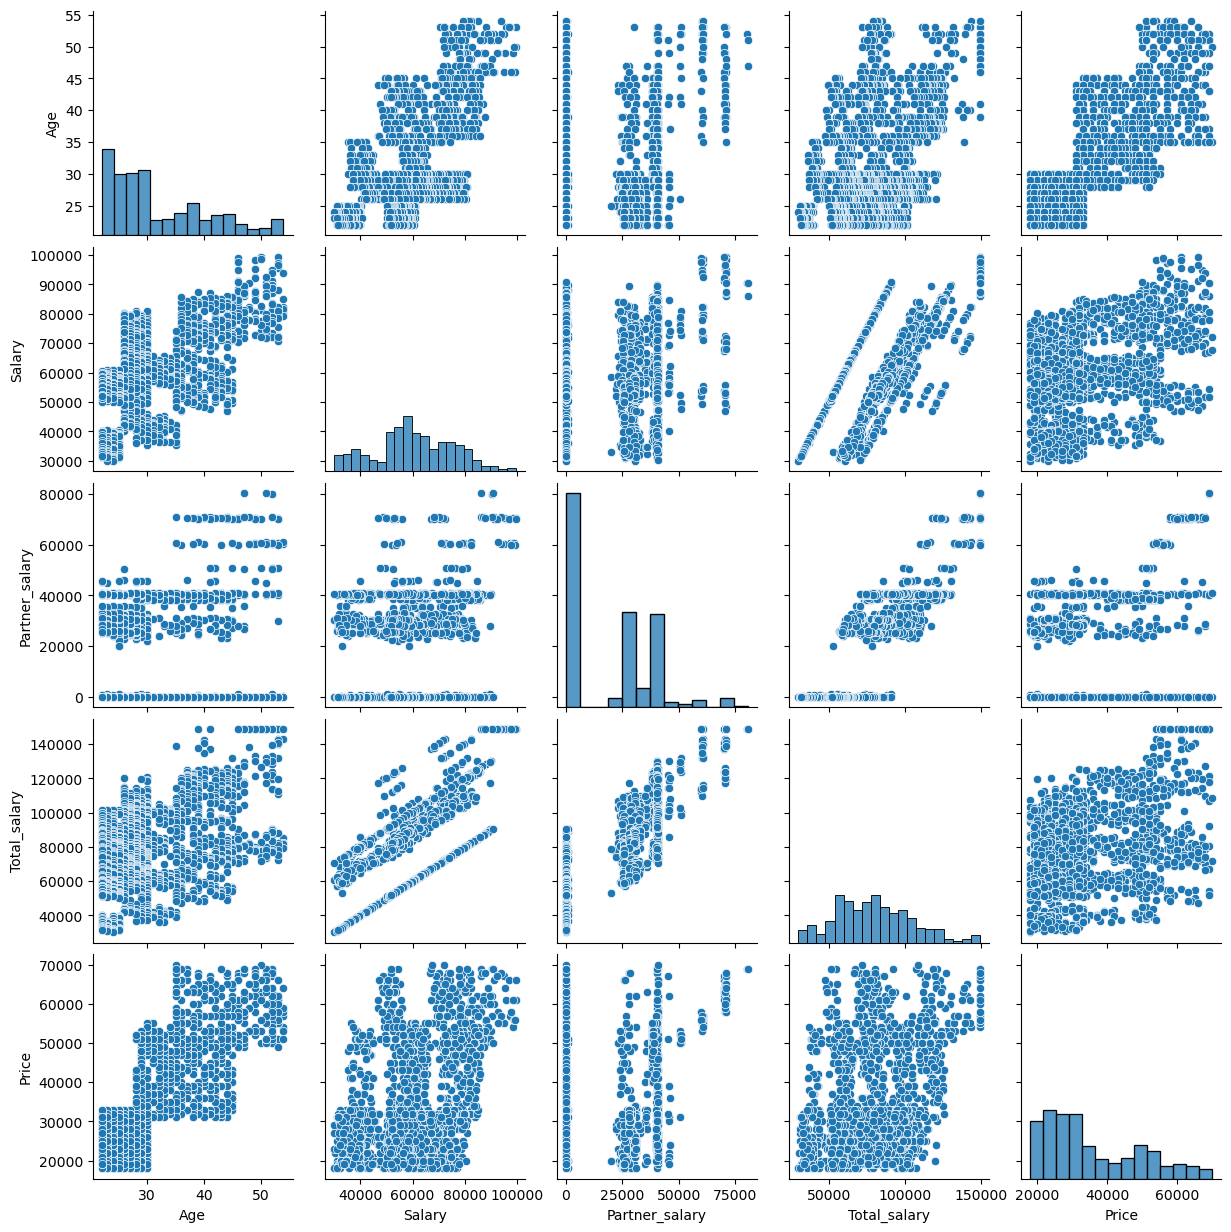

In [135]:
plt.figure(figsize=(12,12))
sns.pairplot(df.drop('No_of_Dependents',1));

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1200x1200 with 0 Axes>

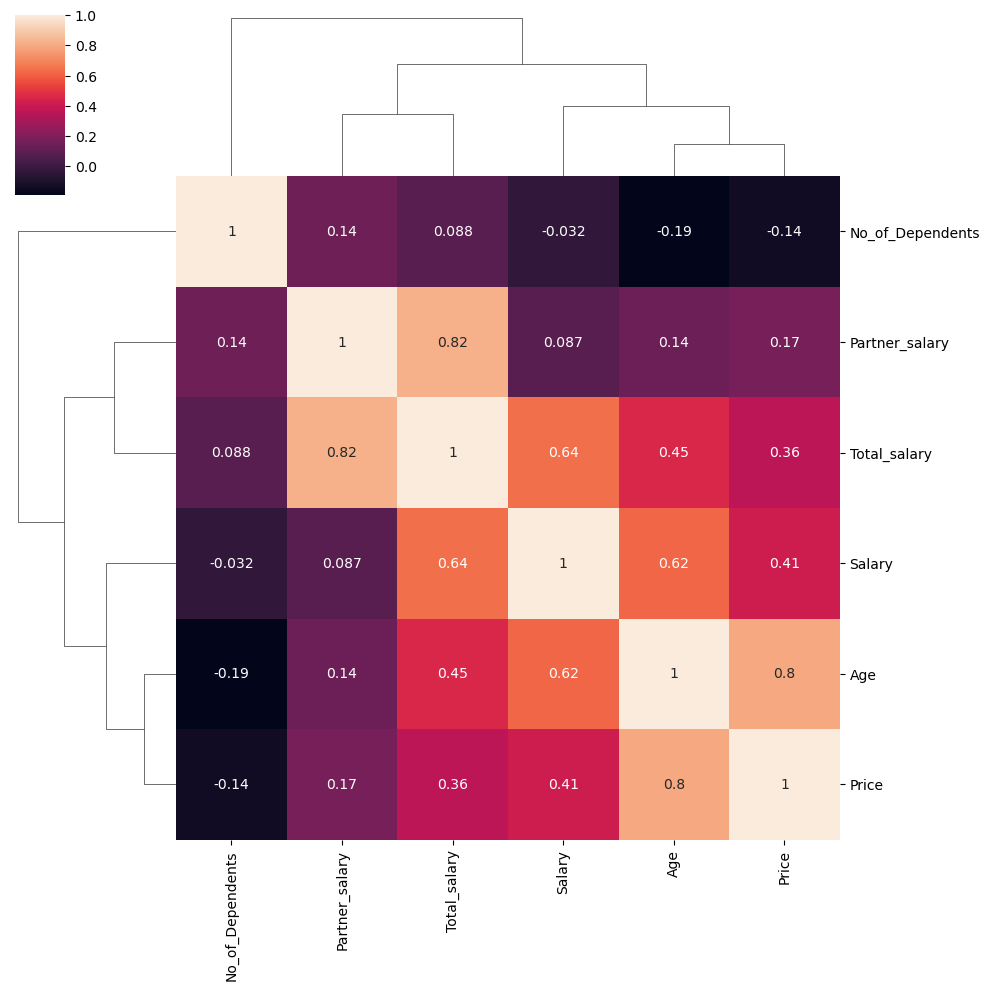

In [136]:
plt.figure(figsize=(12,12))
sns.clustermap(df.corr(),annot=True);

- From heatmap,
    - Customer's Age is 80% Strongly as well as Positively correlated to Price of the Car. Similarly, Age is 45% positively correlated with Total Salary of the customer.
    - With Increase in Age of the Customer, then Salary will also increase. Which can be interpreted as Age is 62% strong and positively correlated to Salary.
    - Total Salary and Salary usually decides the Purchasing Power of the Car. Since, Price is positively correlated at 41% with Salary and 36% with Total Salary respectively. 
    - We don't see much negative correlation among any variables. Just few variables showing weak correlation.

<IPython.core.display.Javascript object>

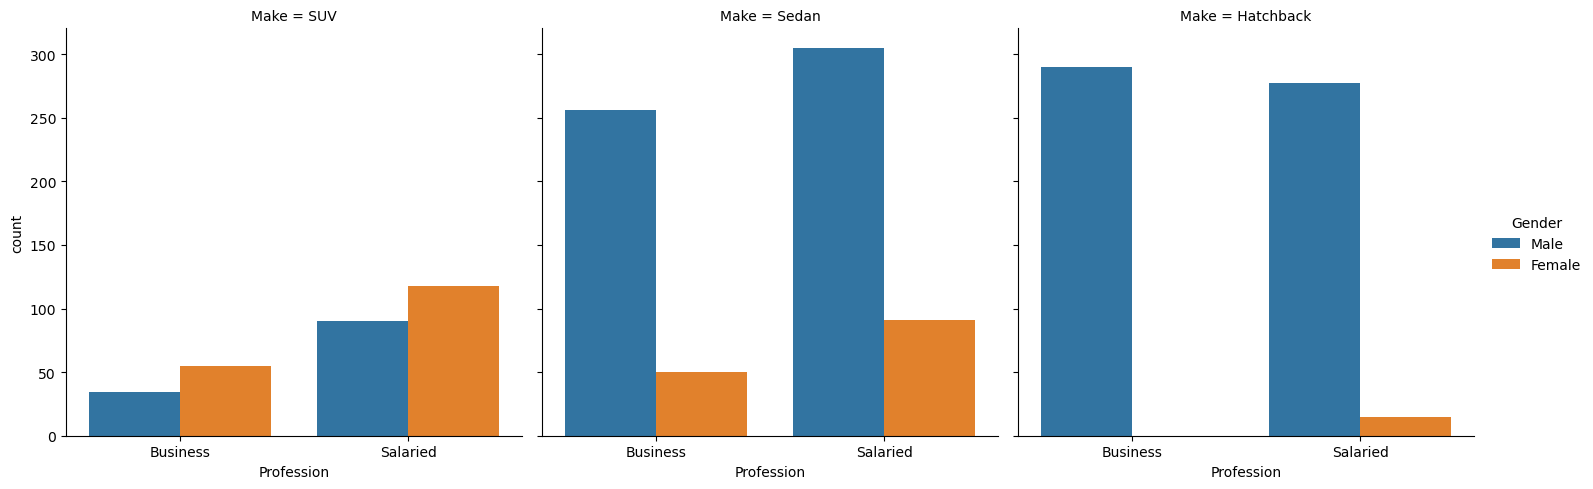

In [137]:
sns.catplot(x='Profession', hue='Gender', col='Make', kind='count',data =df);

 ### Analysis Questions - E

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

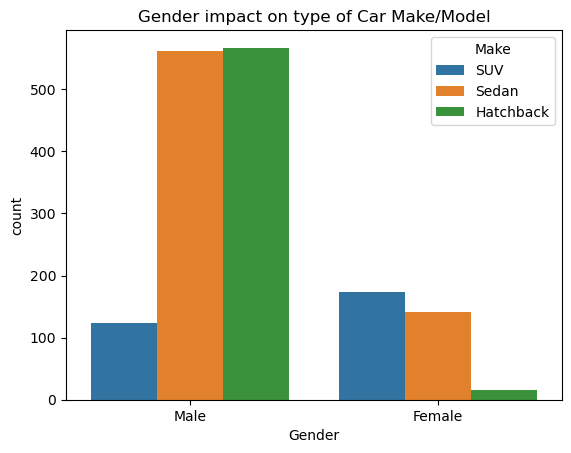

In [140]:
sns.countplot(x=df.Gender, hue=df.Make)
plt.title('Gender impact on type of Car Make/Model');

In [139]:
pd.crosstab(index=df.Gender, columns=df.Make, margins=1)

<IPython.core.display.Javascript object>

Make,Hatchback,SUV,Sedan,All
Gender,,,,
Female,15,173,141,329
Male,567,124,561,1252
All,582,297,702,1581


- E1 - Steve Roger says 'Men prefer SUV by a large margin, compared to the woman'.
    - This statement is **False**, where Females are using more SUVs compared to Males.
    - No. of Males have SUVs is 124, whereas Females have 173 SUVs.

In [144]:
df[df.Profession=='Salaried']

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,149000,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,149000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
5,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,79800,60500.0,140300,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,22,Male,Salaried,Married,Graduate,3,No,Yes,No,38600,0.0,38600,22000,Hatchback
1574,22,Male,Salaried,Married,Graduate,3,Yes,Yes,No,34700,0.0,34700,20000,Sedan
1575,22,Male,Salaried,Married,Graduate,3,Yes,No,No,34000,0.0,34000,19000,Hatchback
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

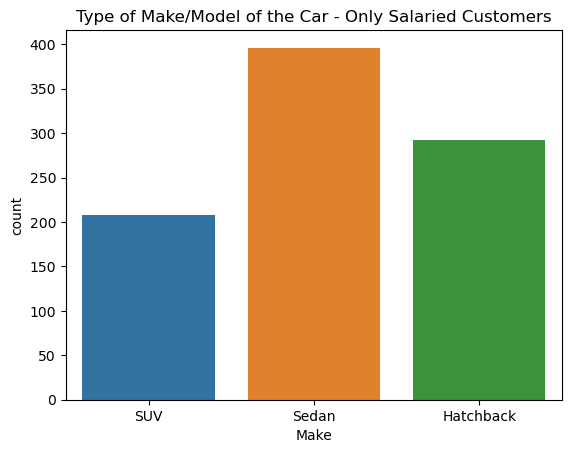

In [147]:
sns.countplot(x=df[df.Profession=='Salaried']['Make'])
plt.title('Type of Make/Model of the Car - Only Salaried Customers');

In [146]:
df[df.Profession=='Salaried']['Make'].value_counts()

Sedan        396
Hatchback    292
SUV          208
Name: Make, dtype: int64

- E2 - Ned Stark believes that a salaried person is more likely to buy a Sedan.
    - This statement is **True**, From the graph we can interpret that Sedan Cars are being sold more.
    - There are 396 Sedan Cars are sold when compared to 292 Hatchback and 208 SUV models.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

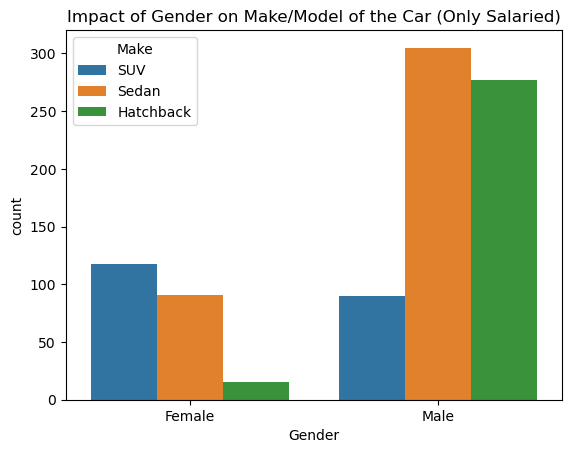

In [148]:
sns.countplot(x=df[df.Profession=='Salaried']['Gender'], hue=df[df.Profession=='Salaried']['Make'])
plt.title('Impact of Gender on Make/Model of the Car (Only Salaried)');

In [149]:
pd.crosstab(index=df[df.Profession=='Salaried']['Gender'], columns=df[df.Profession=='Salaried']['Make'], margins=1)

<IPython.core.display.Javascript object>

Make,Hatchback,SUV,Sedan,All
Gender,,,,
Female,15,118,91,224
Male,277,90,305,672
All,292,208,396,896


- E3 - Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.
    - This statement is **False** because a Salaried Male is not easier target for a SUV sale.
    - From the graph, Salaried Males are easily targeted for Sedan and Hatchback models but least preferred by SUVs.
    - Salaried Males bought 305 Sedan, 277 Hatchback, and 90 SUVs models overall. 

### F 

<IPython.core.display.Javascript object>

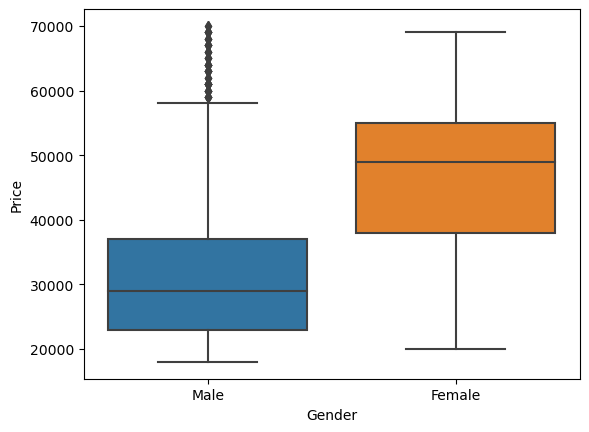

In [150]:
sns.boxplot(x=df.Gender, y=df.Price);

In [151]:
pd.crosstab(index=df.Gender, columns=df.Make, values=df.Price, aggfunc='sum', margins=1)

<IPython.core.display.Javascript object>

Make,Hatchback,SUV,Sedan,All
Gender,,,,
Female,412000,9252000,6031000,15695000
Male,14996000,7328000,18261000,40585000
All,15408000,16580000,24292000,56280000


In [152]:
df.groupby('Gender').sum()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Gender,,,,,,
Female,13004,671,21778000,7400800.0,28967700,15695000
Male,37465,3215,73702100,23007800.0,96561400,40585000


In [153]:
df.Gender.value_counts(normalize=1)

Male      0.791904
Female    0.208096
Name: Gender, dtype: float64

In [154]:
40585000/1252, 15695000/329

(32416.134185303516, 47705.16717325228)

In [155]:
 47705.17 - 32416.14

15289.029999999999

- The Total Amount spent on purchasing automobiles by Gender is,
    - Males - 4,05,85,000 dollars
    - Females - 1,56,95,000 dollars
- But we have very biased data wrt Gender i.e.,
    - Males are 80% (1252 Males)
    - Females are 20% (329 Females)
- So let's calculate total amount spent per taking individual customer in Gender,
    - Total Amount spent on Automobile purchasing for Males / No. of Males.
        - Amount spent by Each male on Automobile = (40585000/1252) = 32416.14 dollars
    - Total Amount spent on Automobile purchasing for Females / No. of Females.
        - Amount spent by Each male on Automobile = (15695000/329) = 47705.17 dollars 
- From the above calculations, we can suggest that targetting Female salaried customers will have better sales compared to Males. There's a significant difference of 15,290 dollars value. 

<IPython.core.display.Javascript object>

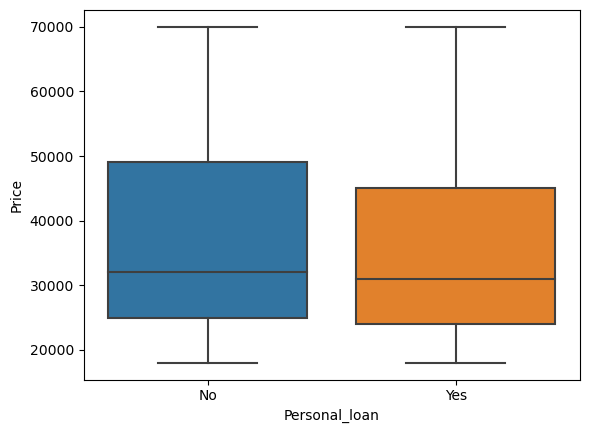

In [158]:
sns.boxplot(x=df.Personal_loan, y=df.Price);

In [159]:
pd.crosstab(index=df.Personal_loan, columns=df.Make, values=df.Price, aggfunc='sum', margins=1)

<IPython.core.display.Javascript object>

Make,Hatchback,SUV,Sedan,All
Personal_loan,,,,
No,7765000,10373000,10852000,28990000
Yes,7643000,6207000,13440000,27290000
All,15408000,16580000,24292000,56280000


In [160]:
df.groupby('Personal_loan').sum()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Personal_loan,,,,,,
No,25657,2014,48324900,15645300.0,63706100,28990000
Yes,24812,1872,47155200,14763300.0,61823000,27290000


In [161]:
df.Personal_loan.value_counts(normalize=1)

Yes    0.500949
No     0.499051
Name: Personal_loan, dtype: float64

In [162]:
27290000/792, 28990000/789

(34457.07070707071, 36742.71229404309)

In [163]:
36742.72 - 34457.08

2285.6399999999994

- The Total Amount spent on purchasing automobiles on the basis of Personal Loan is,
    - Yes, Customers has Personal Loan - 2,72,90,000 dollars
    - No, Customers don't have Personal Loan - 2,89,90,000 dollars 
- We don't have biased data wrt Personal Loan i.e.,
    - Customers having Personal Loan are ~50% (792)
    - Customers not having Personal Loan are ~50% (789)
- So let's calculate total amount spent per taking individual customer on the basis of Personal Loan,
    - Total Amount spent on Automobile purchasing for customers opted Loan / No. of customers opted loan.
        - Amount spent by Each customer opted Personal Loan = (27290000/792) = 34457.08 dollars
    - Total Amount spent on Automobile purchasing for customers not opted Loan / No. of customers not opted Loan.
        - Amount spent by Each customer not opted Personal Loan = (28990000/789) = 36742.72 dollars 
- From the above calculations, we can suggest that targetting customers having Personal loan or not having Personal Loan is not going to impact a lot. But Yes, Total Amount spent by customers not having Personal Loan has spent little high with difference of 2,285.7 dollars value.

### G

In [165]:
df.groupby('Partner_working').sum()[['Salary','Partner_salary','Total_salary','Price']]

,Salary,Partner_salary,Total_salary,Price
Partner_working,,,,
No,43155900,0.0,43155900,25668000
Yes,52324200,30408600.0,82373200,30612000


In [166]:
df.Partner_working.value_counts(normalize=1)

Yes    0.54902
No     0.45098
Name: Partner_working, dtype: float64

In [167]:
30612000/868, 25668000/713

(35267.28110599078, 36000.0)

In [168]:
36000 - 35267.28

732.7200000000012

- The Total Amount spent on purchasing automobiles on the basis of Working Partner is,
    - Yes, Customers has Working Partner - 3,06,12,000 dollars
    - No, Customers don't have Working Partner - 2,56,68,000 dollars 
- We don't have baised data wrt Working Partner column i.e.,
    - Customers having Working Partner are ~55% (868)
    - Customers not having Working Partner are ~45% (713)
- So let's calculate total amount spent per taking individual customer on the basis of Working Partner,
    - Total Amount spent on Automobile purchasing for customers having Working Partner / No. of customers having Working Partner.
        - Amount spent by Each customer having Working Partner = (30612000/868) = 35267.28 dollars
    - Total Amount spent on Automobile purchasing for customers not having Working Partner / No. of customers not having Working Partner.
        - Amount spent by Each customer not having Working Partner = (25668000/713) = 36000 dollars 
- From the above calculations, we can suggest that targeting customers having Working Partner or not having Working Partner is not going to impact a lot. But Yes, Total Amount spent by customers having Working Partner has spent little high with difference of 732.7 dollars value.

In [169]:
df.groupby('Partner_working').mean()[['Price']].rename(columns={'Price':'Mean Price'})

,Mean Price
Partner_working,
No,36000.000000
Yes,35267.281106


In [170]:
36000 - 35267.29

732.7099999999991

- From Mean, Having Working Partner or not having is not going to impact much with sales. But there's slightly less chances for buying higher priced car when having working partner.
- Mean Price,
    - Having Working Partner - 35267.29 dollars
    - Not Having Working Partner - 36000 dollars
    - Difference is 732.71 dollars

In [171]:
df.groupby('Partner_working').median()[['Price']].rename(columns={'Price':'Median Price'})

,Median Price
Partner_working,
No,31000.0
Yes,31000.0


- From Median, Having Working Partner or not having is not going to impact, Because the median value is same in both cases.
- Median Price,
    - Having Working Partner - 31000 dollars
    - Not Having Working Partner - 31000 dollars
    - No difference in value.

### H

In [189]:
df.Gender.value_counts(normalize=1)

Male      0.791904
Female    0.208096
Name: Gender, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

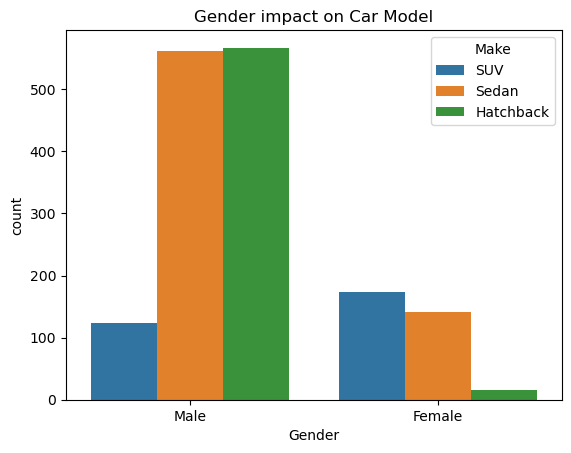

In [192]:
sns.countplot(x=df.Gender, hue=df.Make)
plt.title('Gender impact on Car Model');

In [187]:
pd.crosstab(index=df.Gender, columns=df.Make, margins=1)

<IPython.core.display.Javascript object>

Make,Hatchback,SUV,Sedan,All
Gender,,,,
Female,15,173,141,329
Male,567,124,561,1252
All,582,297,702,1581


- From the above graph, It is suggested that targeting Males with Hatchback and Sedan will have a better impact on sales. 
- A campaign can be conducted for these 2 models to attract lots of Males and provide better discounts.
- SUVs are least preferred by Male, finding out reasons and change marketing strategies for SUVs at different locations with set of targeting customers might increase sales.
- As we do have very biased with Gender, Female customers are very less in percentage as compared to Males. We want to implement a campaign to attract to Female and provide better offers for any woman purchasing automobile.
- Women are interested in purchasing SUVs which is completely contrast to Male. So if we can gain more Female customers then eventually sales for SUVs would go up.

In [190]:
df.Marital_status.value_counts(normalize=1)

Married    0.912713
Single     0.087287
Name: Marital_status, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

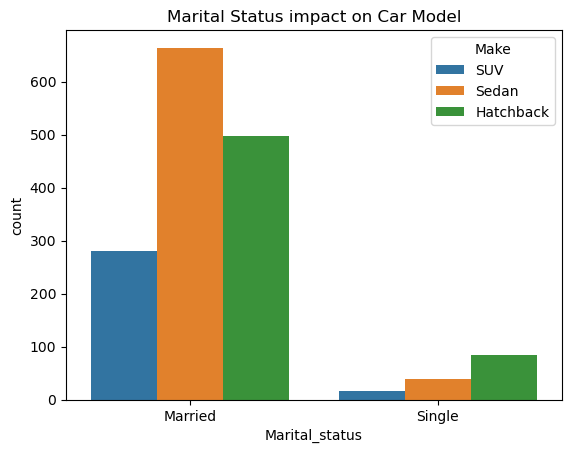

In [193]:
sns.countplot(x=df.Marital_status, hue=df.Make)
plt.title('Marital Status impact on Car Model');

In [194]:
pd.crosstab(index=df.Marital_status, columns=df.Make, margins=1)

<IPython.core.display.Javascript object>

Make,Hatchback,SUV,Sedan,All
Marital_status,,,,
Married,498,281,664,1443
Single,84,16,38,138
All,582,297,702,1581


- We have very biased data for Marital Status, where married customers are ~91% and Singles are just ~9%.
- From Married customers, we can analyse that sedan is top most car bought by many married customers then followed by Hatchback and then finally SUVs
- We can do a campaign for increasing the sales for Hatchback to a little extent and a find strong reasons for SUVs campaign especially for married couples.
- SUVs are being very expensive so no one is showing more interest to buy, Maybe Automobile organisation can solute to provide better offers or discounts for celebrating anniversaries for married couples to increase sales.

<IPython.core.display.Javascript object>

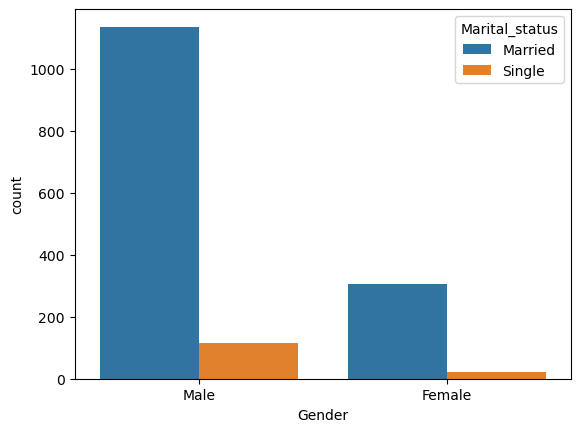

In [179]:
sns.countplot(x=df.Gender, hue=df.Marital_status);